In [40]:
%matplotlib inline

In [41]:
import geopandas as gp
import pandas as pd
import ast
import json
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import numpy as np
import mplleaflet

plt.rcParams['figure.figsize'] = 12, 8

Use this for analysis:

http://stackoverflow.com/questions/33440530/identify-unique-groupings-of-polygons-in-geopandas-shapely

## Notes

- Each of these polygons that are being read are unique.  The decoder has already separated entries with multiple polygons

###Read Geojson into geopandas

In [284]:
df = gp.read_file('../landfill_geojson.geojson')

In [283]:
df.shape

(954, 14)

In [282]:
df.head()

area               fac_name fac_state        fac_street  \
0    74336.879239  AMERICAN DISPOSAL INC        RI  23 GREEN HILL RD   
1     8977.979795  AMERICAN DISPOSAL INC        RI  23 GREEN HILL RD   
2  1275812.214490  AMERICAN DISPOSAL INC        RI  23 GREEN HILL RD   
3   300607.715762     ASTI WASTE SYSTEMS        CT  182-2 DANBURY RD   
4  1114961.938569  AMERICAN DISPOSAL INC        RI  23 GREEN HILL RD   

                                            geometry  \
0  POLYGON ((-71.52917097350966 41.79511484405755...   
1  POLYGON ((-71.5351442529862 41.79629064209585,...   
2  POLYGON ((-71.54515693923918 41.80168943778234...   
3  POLYGON ((-73.42464753303524 41.5462933224311,...   
4  POLYGON ((-71.5342107371843 41.81284982596986,...   

                              id  task_id           task_run__created  \
0  OpenLayers_Feature_Vector_340   501701  2014-04-11T18:02:24.061996   
1  OpenLayers_Feature_Vector_333   501701  2014-04-11T18:02:56.660754   
2  OpenLayers_Feature_Vector_316   501701  2014-04-11T18:03:09.583790   
3  OpenLayers_Feature_Vector_735   501703  2014-04-11T18:03:58.458460   
4  OpenLayers_Feature_Vector_521   501701  2014-04-11T18:03:58.556272   

        task_run__finish_time  task_run__id task_run__user_ip  \
0  2014-04-11T18:02:24.062013        629898              None   
1  2014-04-11T18:02:56.660769        629899     216.165.95.69   
2  2014-04-11T18:03:09.583808        629900              None   
3  2014-04-11T18:03:58.458477        629903     216.165.95.69   
4  2014-04-11T18:03:58.556288        629904     216.165.95.70   

   task_runinfo__certain  task_runinfo__skip task_user_id  
0                      0                   0         4038  
1                     -1                   0         None  
2                      1                   0            5  
3                     -1                   0         None  
4                     -1                   0         None

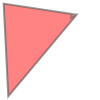

In [209]:
df.loc[23]['geometry']

In [246]:
# this is a triangle which has geometry problems
df.drop(23, inplace=True)

In [278]:
df[df['task_id'] == 502884]

area                             fac_name fac_state  \
635  75349.174705  CHEMICAL WASTE MANAGEMENT OF THE NW        OR   

                 fac_street  \
635  17629 CEDAR SPRINGS LN   

                                              geometry  \
635  POLYGON ((-120.2538048515158 45.61852109481215...   

                                id  task_id           task_run__created  \
635  OpenLayers_Feature_Vector_744   502884  2015-08-28T19:21:05.230221   

          task_run__finish_time  task_run__id task_run__user_ip  \
635  2015-08-28T19:21:05.230239       2262540              None   

     task_runinfo__certain  task_runinfo__skip task_user_id  
635                     -1                   0         4025

KeyError: 0

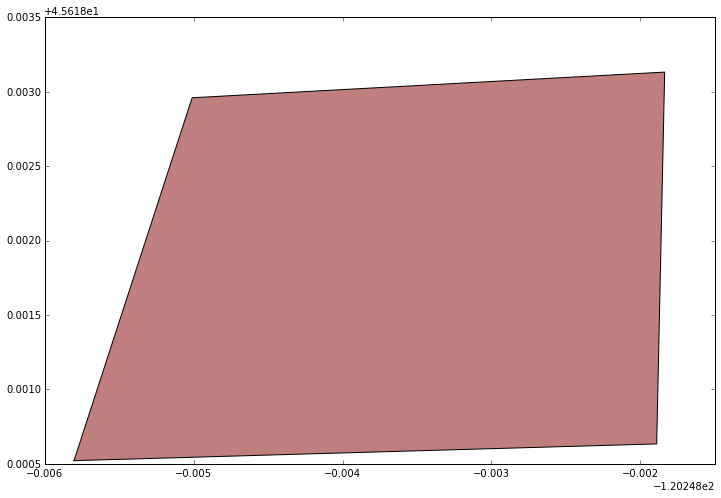

In [277]:
landfill = df[df['task_id'] == 501701]
landfill.plot()
title = landfill['fac_name'][0] + " - " + landfill['fac_street'][0] + ", " + landfill['fac_state'][0]
plt.title(title)
#plt.savefig('../plots/example_overlay.png', dpi=200)

In [271]:
landfill

area               fac_name fac_state        fac_street  \
0      74336.879239  AMERICAN DISPOSAL INC        RI  23 GREEN HILL RD   
1       8977.979795  AMERICAN DISPOSAL INC        RI  23 GREEN HILL RD   
2    1275812.214490  AMERICAN DISPOSAL INC        RI  23 GREEN HILL RD   
4    1114961.938569  AMERICAN DISPOSAL INC        RI  23 GREEN HILL RD   
6     912814.292171  AMERICAN DISPOSAL INC        RI  23 GREEN HILL RD   
9    1310087.359262  AMERICAN DISPOSAL INC        RI  23 GREEN HILL RD   
53   1077901.216904  AMERICAN DISPOSAL INC        RI  23 GREEN HILL RD   
89     18649.360682  AMERICAN DISPOSAL INC        RI  23 GREEN HILL RD   
90   1388065.798058  AMERICAN DISPOSAL INC        RI  23 GREEN HILL RD   
94   1455424.703985  AMERICAN DISPOSAL INC        RI  23 GREEN HILL RD   
119  1460175.256477  AMERICAN DISPOSAL INC        RI  23 GREEN HILL RD   
126  1292464.061454  AMERICAN DISPOSAL INC        RI  23 GREEN HILL RD   
144  1430173.074528  AMERICAN DISPOSAL INC        RI  23 GREEN HILL RD   

                                              geometry  \
0    POLYGON ((-71.52917097350966 41.79511484405755...   
1    POLYGON ((-71.5351442529862 41.79629064209585,...   
2    POLYGON ((-71.54515693923918 41.80168943778234...   
4    POLYGON ((-71.5342107371843 41.81284982596986,...   
6    POLYGON ((-71.54508634789848 41.80178699142648...   
9    POLYGON ((-71.54268930694514 41.8077355489779,...   
53   POLYGON ((-71.54537151596186 41.80184939516092...   
89   POLYGON ((-71.53470168849945 41.79563475741588...   
90   POLYGON ((-71.54535005828825 41.80143350514594...   
94   POLYGON ((-71.5455646350091 41.80149748840136,...   
119  POLYGON ((-71.54547880432183 41.8013695218266,...   
126  POLYGON ((-71.54496382019013 41.80140151349426...   
144  POLYGON ((-71.5453071429437 41.8013695218266, ...   

                                id  task_id           task_run__created  \
0    OpenLayers_Feature_Vector_340   501701  2014-04-11T18:02:24.061996   
1    OpenLayers_Feature_Vector_333   501701  2014-04-11T18:02:56.660754   
2    OpenLayers_Feature_Vector_316   501701  2014-04-11T18:03:09.583790   
4    OpenLayers_Feature_Vector_521   501701  2014-04-11T18:03:58.556272   
6    OpenLayers_Feature_Vector_446   501701  2014-04-11T18:04:13.241909   
9    OpenLayers_Feature_Vector_374   501701  2014-04-11T18:04:43.865085   
53   OpenLayers_Feature_Vector_322   501701  2014-04-12T02:35:00.013522   
89   OpenLayers_Feature_Vector_338   501701  2014-04-17T13:17:11.940233   
90   OpenLayers_Feature_Vector_313   501701  2014-04-18T16:17:55.840015   
94   OpenLayers_Feature_Vector_315   501701  2014-04-22T17:04:38.237875   
119  OpenLayers_Feature_Vector_316   501701  2014-04-22T22:04:59.565960   
126  OpenLayers_Feature_Vector_372   501701  2014-04-23T20:31:18.129350   
144  OpenLayers_Feature_Vector_323   501701  2014-04-25T17:45:06.972493   

          task_run__finish_time  task_run__id task_run__user_ip  \
0    2014-04-11T18:02:24.062013        629898              None   
1    2014-04-11T18:02:56.660769        629899     216.165.95.69   
2    2014-04-11T18:03:09.583808        629900              None   
4    2014-04-11T18:03:58.556288        629904     216.165.95.70   
6    2014-04-11T18:04:13.241942        629907     216.165.95.75   
9    2014-04-11T18:04:43.865104        629912              None   
53   2014-04-12T02:35:00.013540        630002      24.90.234.19   
89   2014-04-17T13:17:11.940259        631041     150.163.27.97   
90   2014-04-18T16:17:55.840036        631900     216.165.95.77   
94   2014-04-22T17:04:38.237896        632866     216.165.95.74   
119  2014-04-22T22:04:59.565982        632914     216.165.95.72   
126  2014-04-23T20:31:18.129371        633080     216.165.95.73   
144  2014-04-25T17:45:06.972514        633231              None   

     task_runinfo__certain  task_runinfo__skip task_user_id  
0                        0                   0         4038  
1                       -1                   0     

---

## The Dumb Answer

In [247]:
landfill_mean = df.groupby(['task_id'])['area'].mean()
total = landfill_mean.sum()

print 'Total Landfills Counted: %s' %(len(landfill_mean))
print 'Sum Total Area of Landfills: {:,.2f} m \n'.format(total)

print 'Total Number of Unique Users: %s \n' %(df['task_user_id'].nunique())

print 'Largest Landfill: {:,.2f} m'.format(np.max(landfill_mean))
print 'Smallest Landfill: {:,.2f} m'.format(np.min(landfill_mean))
print 'Average Landfill Area: {:,.2f} m'.format(np.mean(landfill_mean))

Total Landfills Counted: 489
Sum Total Area of Landfills: 340,214,897.17 m 

Total Number of Unique Users: 33 

Largest Landfill: 10,141,207.81 m
Smallest Landfill: 922.89 m
Average Landfill Area: 695,735.99 m


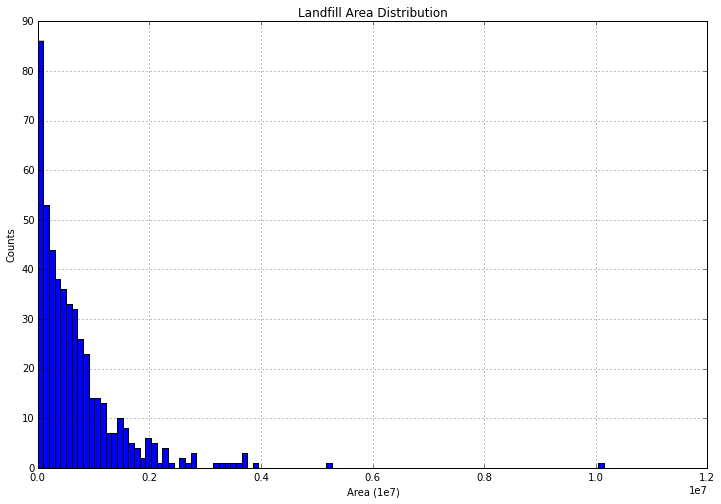

In [212]:
landfill_mean.hist(bins=100)
plt.title('Landfill Area Distribution')
plt.ylabel('Counts')
plt.xlabel('Area (1e7)')

## Working with multiple entries

In [213]:
# get the number of entries per task
task_len = df.groupby(['task_id']).size() 

# subset data if there is more than one entry
multiples = df[df['task_id'].isin(list(task_len[task_len > 1].reset_index()['task_id']))]
non_multiples = df[df['task_id'].isin(list(task_len[task_len == 1].reset_index()['task_id']))]

In [214]:
# Total Number of Polygons
print "Total number of task entries : %s" %(df.shape[0])
print "Total number of tasks with multiple entries : %s" %(multiples.shape[0])

Total number of task entries : 687
Total number of tasks with multiple entries : 277


/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


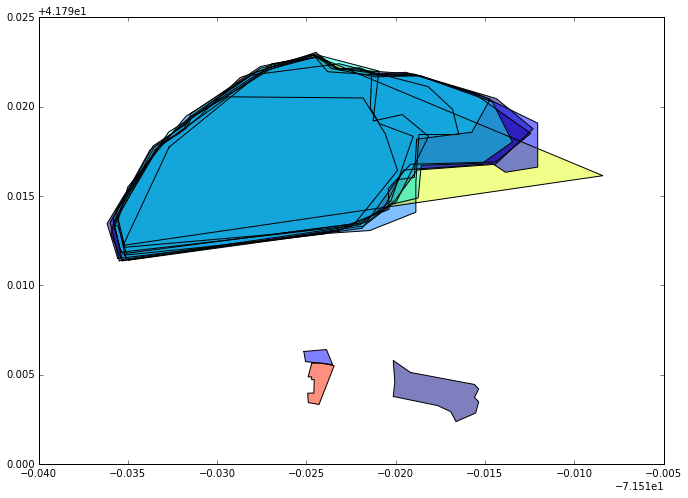

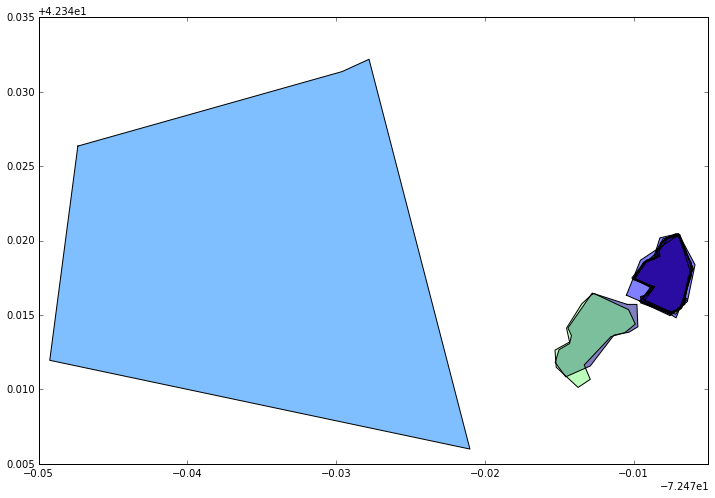

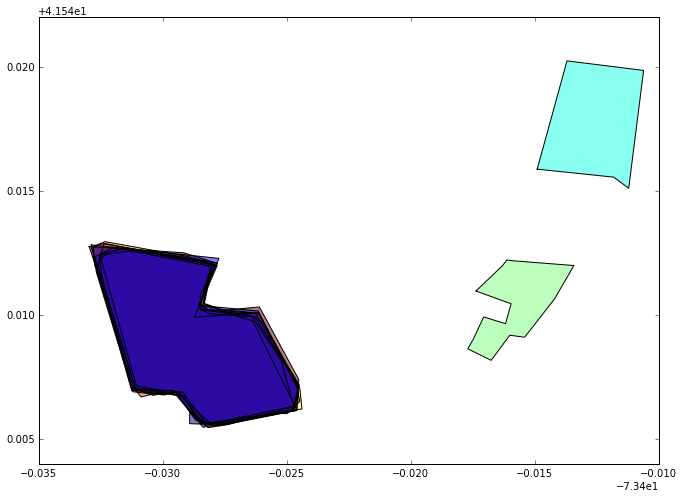

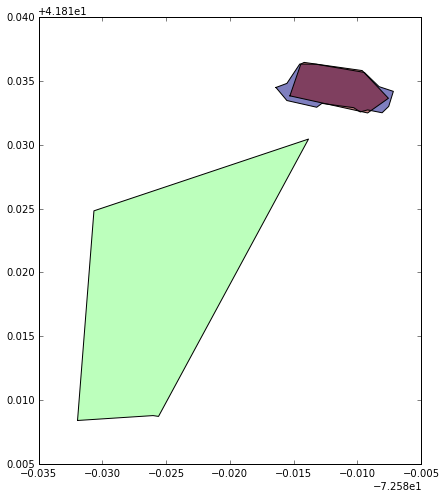

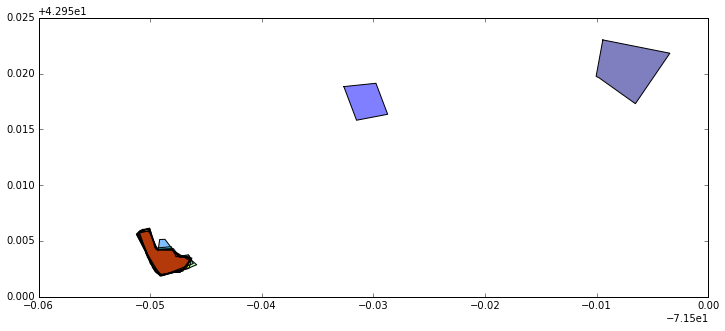

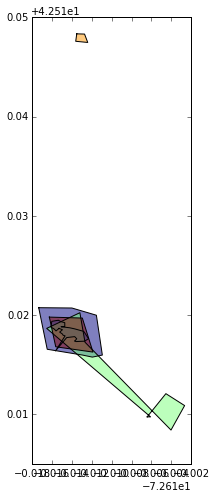

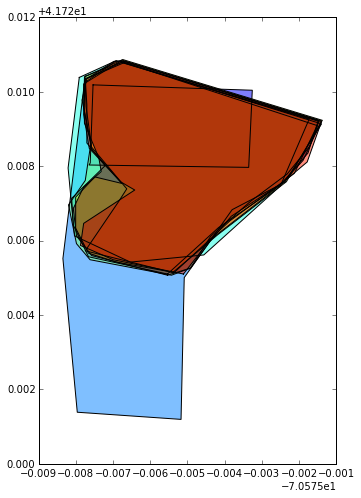

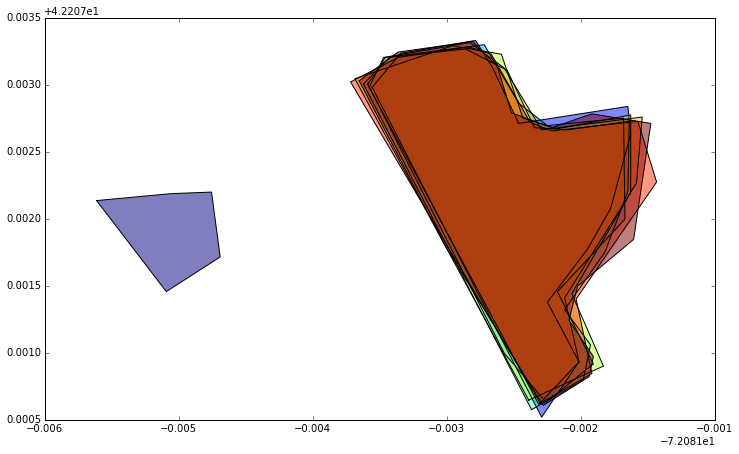

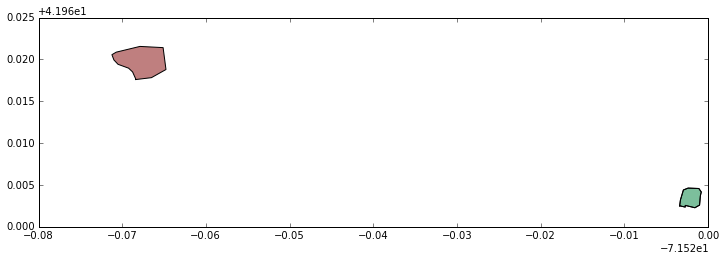

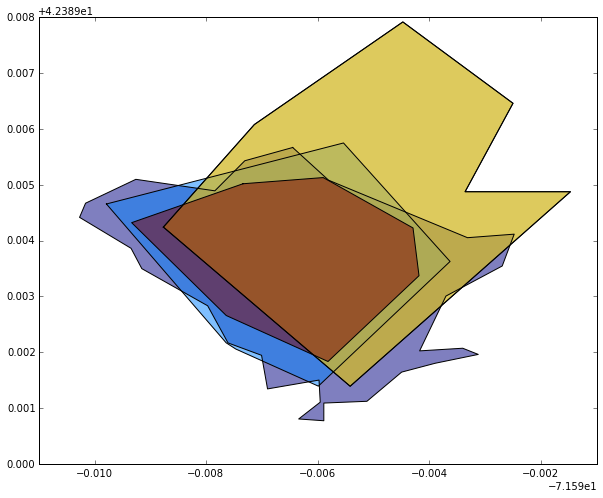

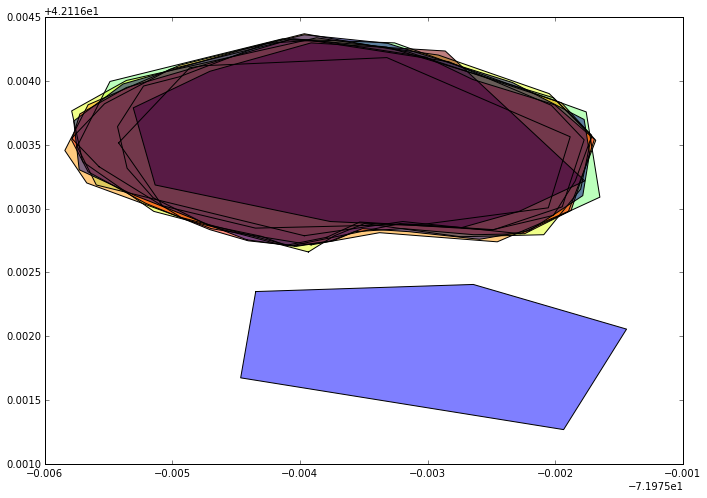

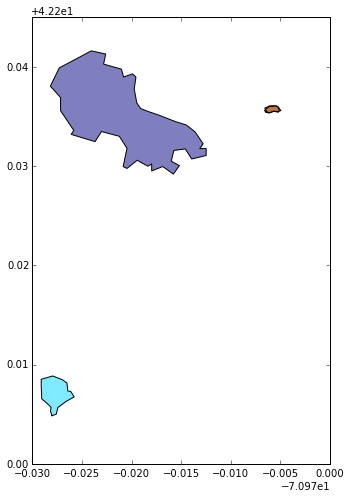

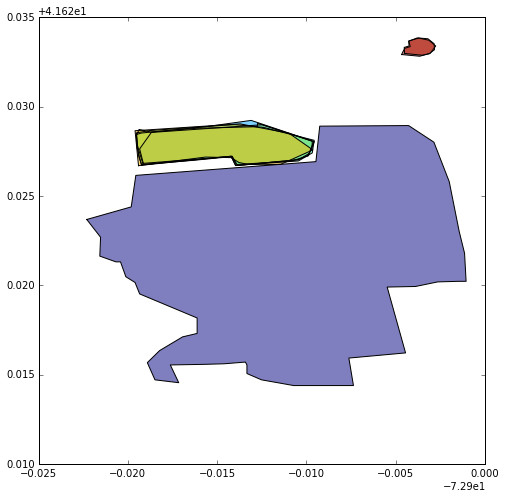

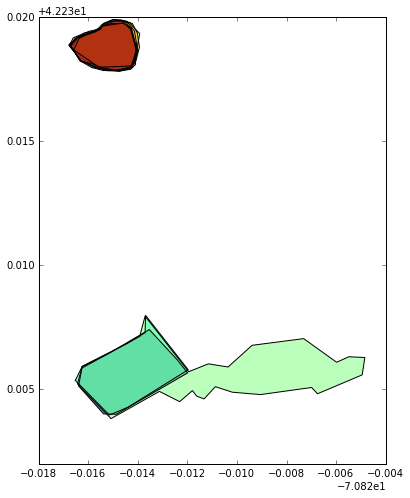

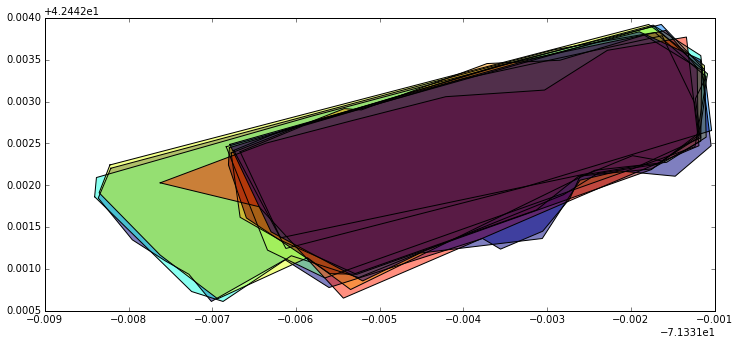

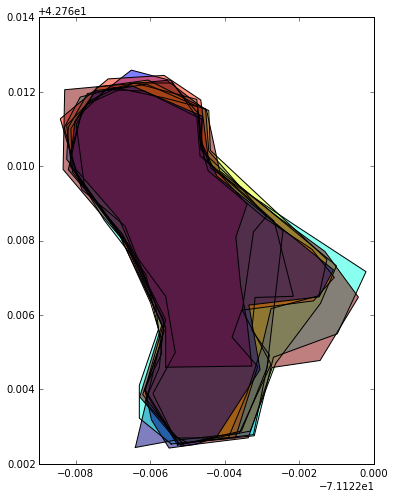

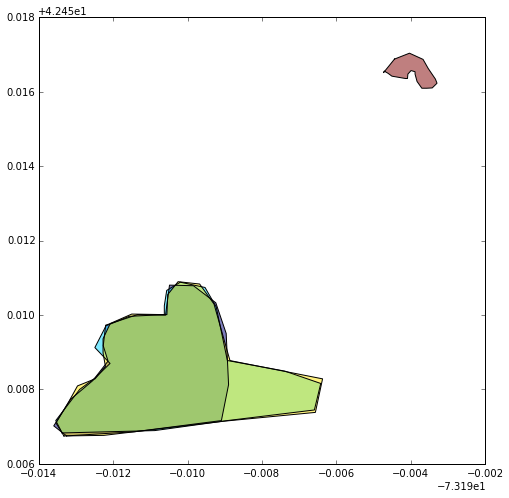

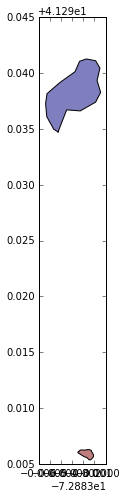

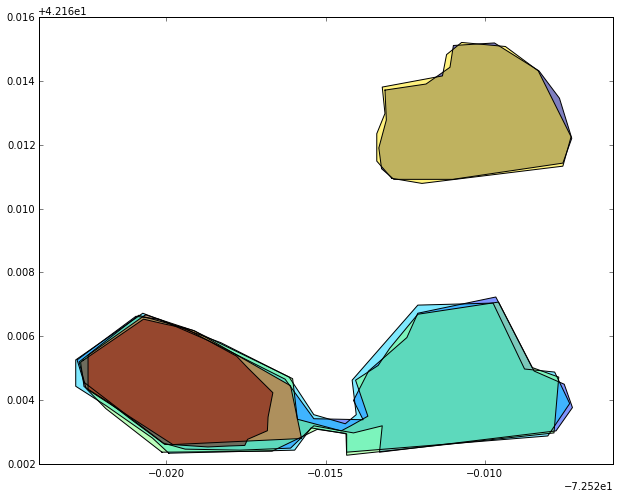

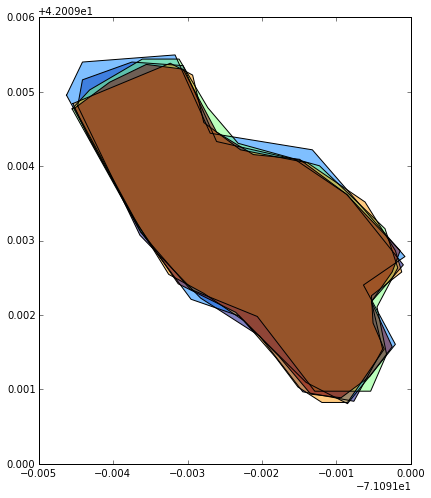

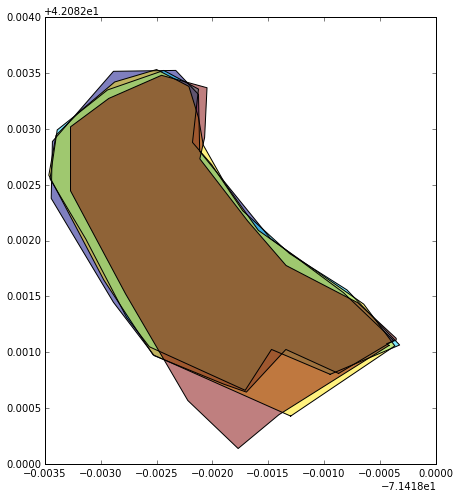

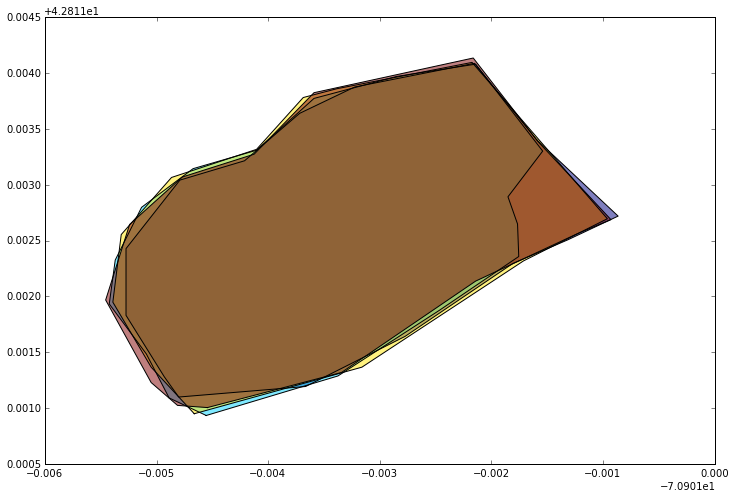

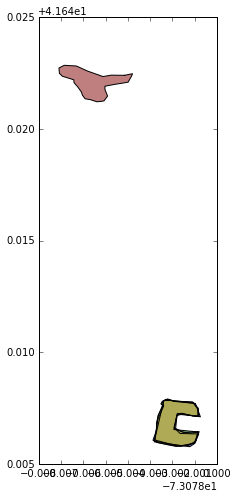

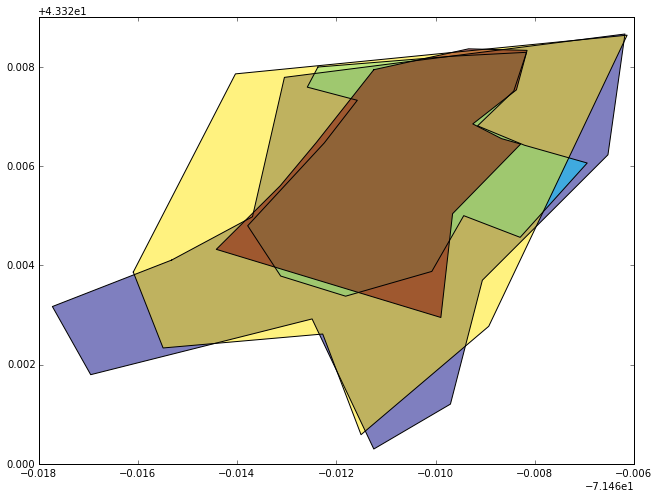

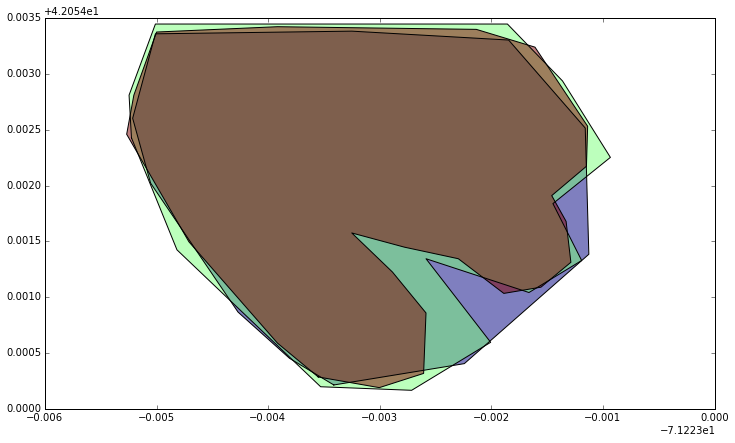

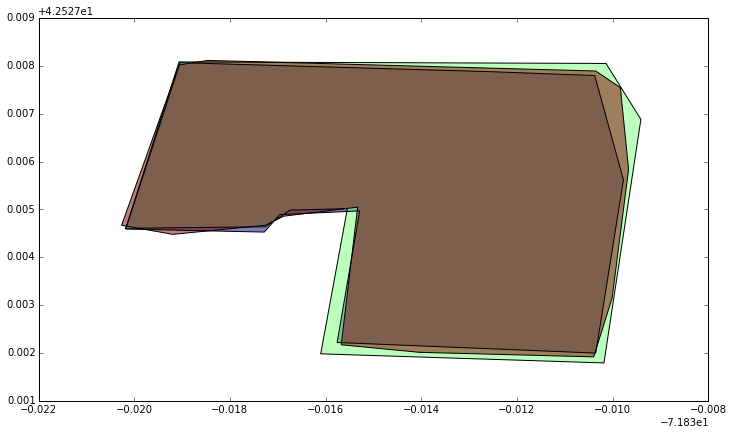

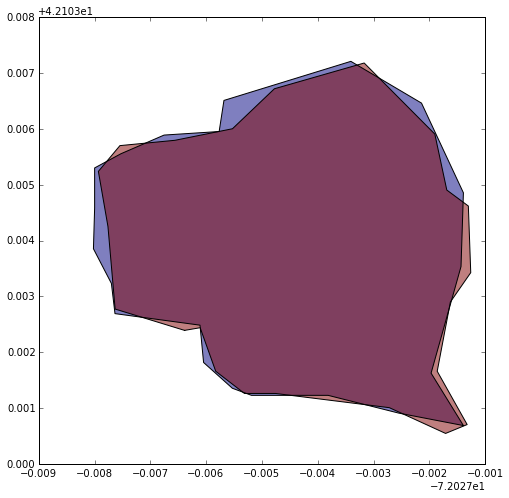

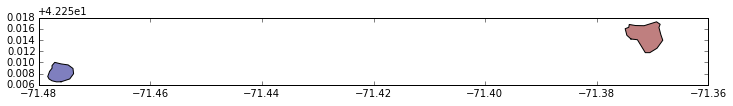

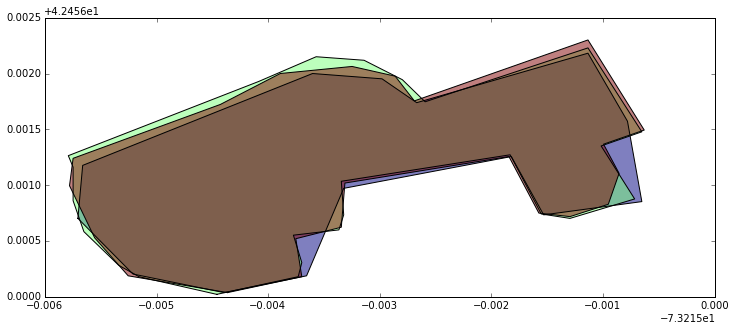

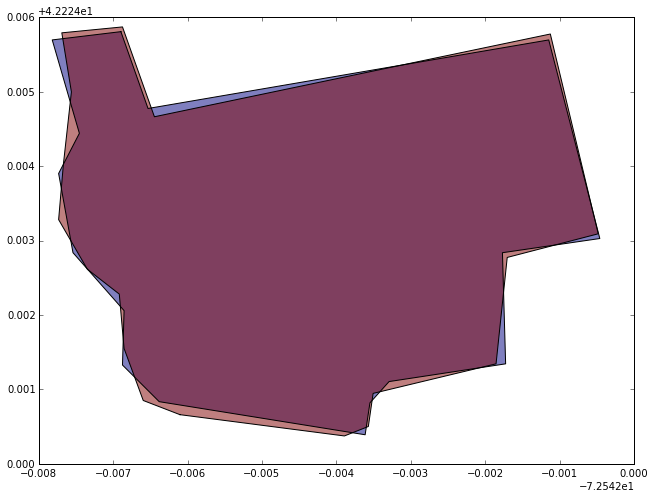

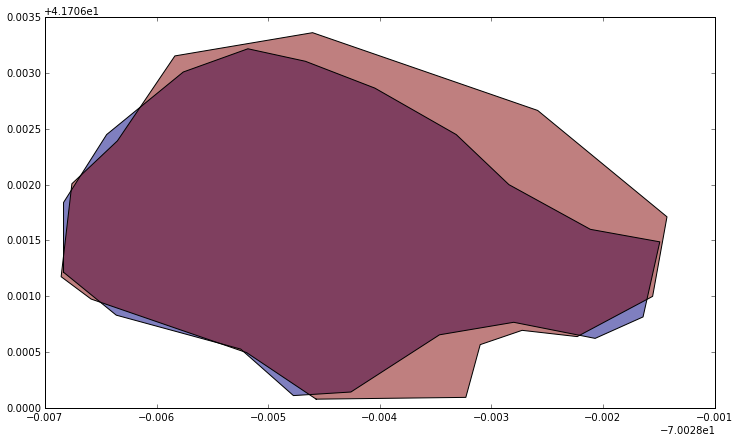

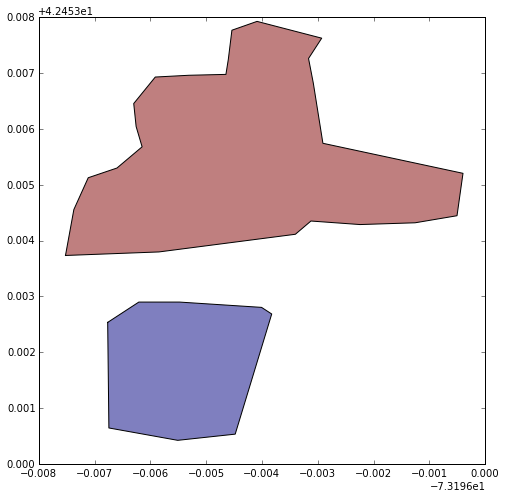

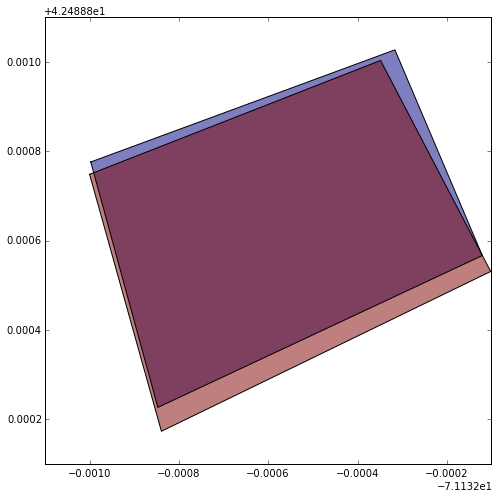

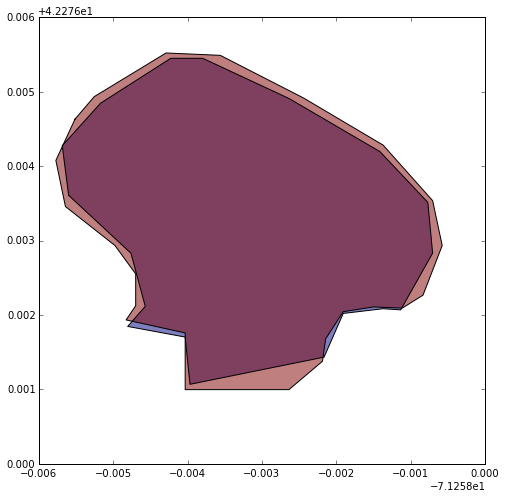

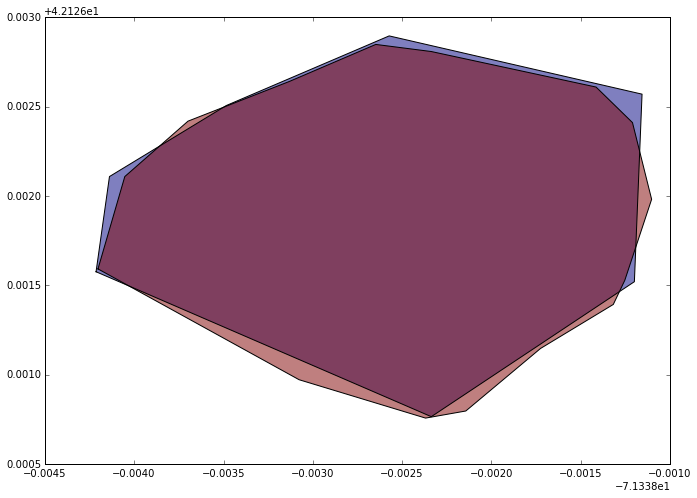

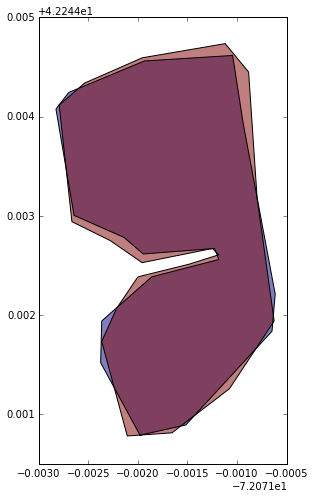

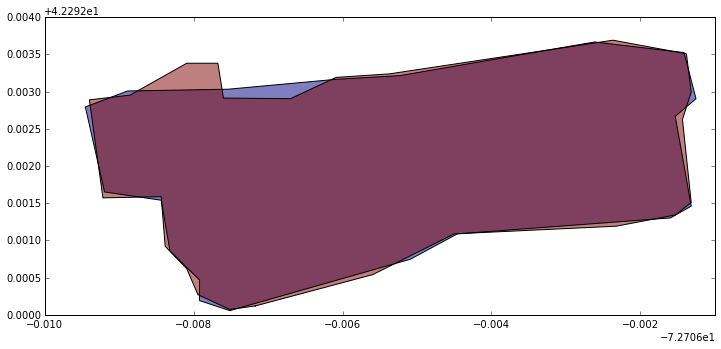

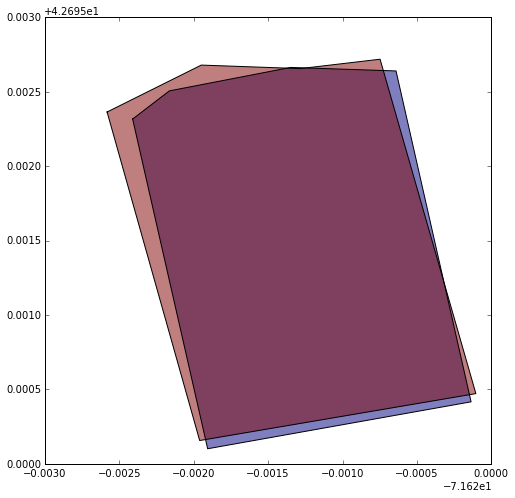

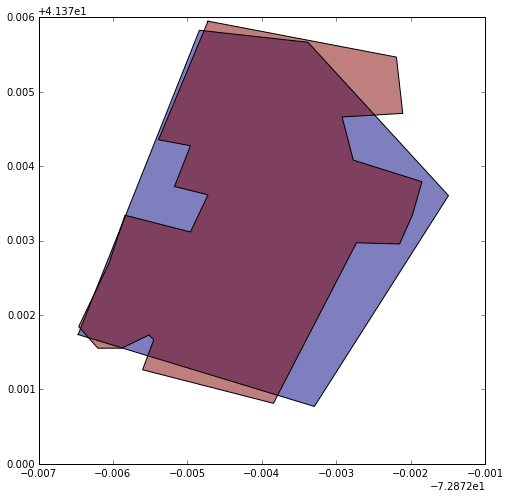

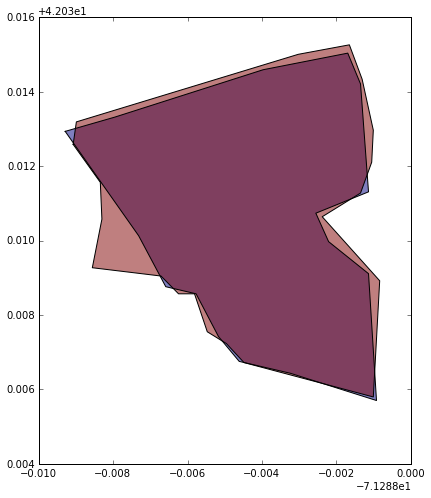

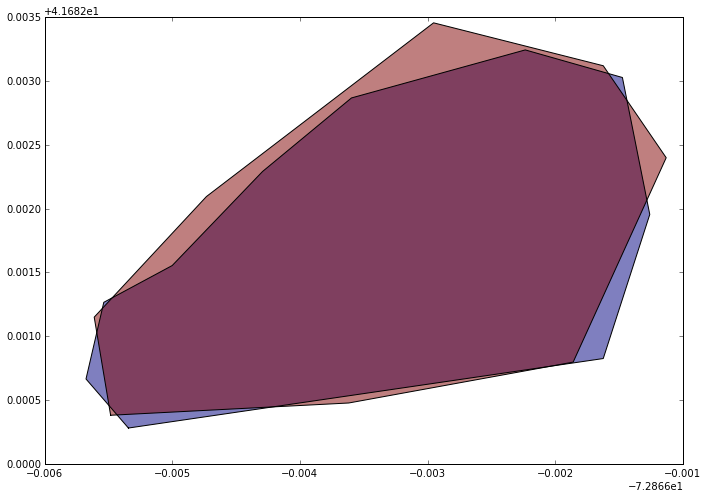

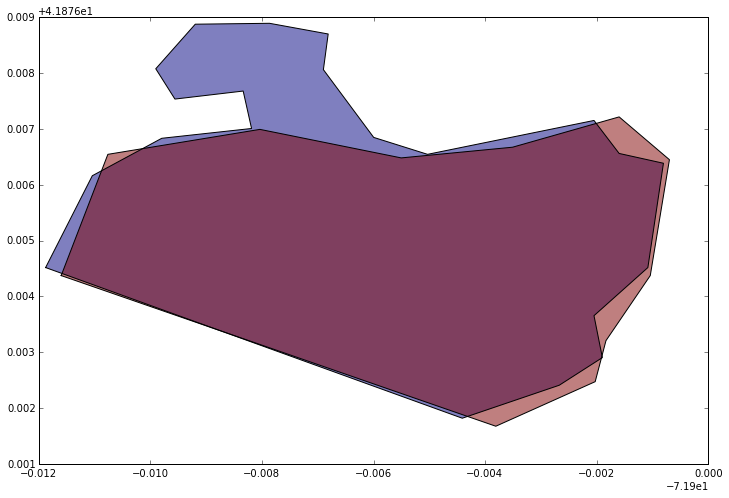

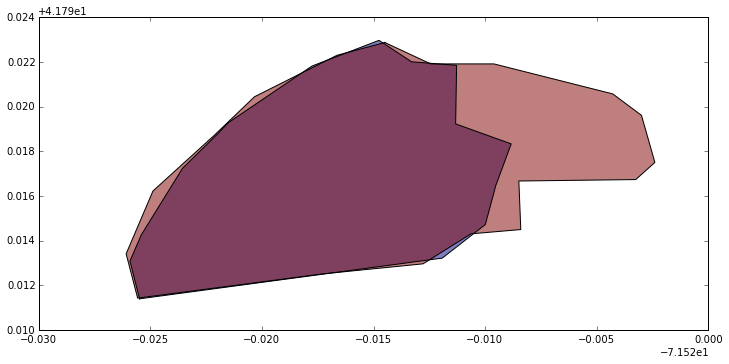

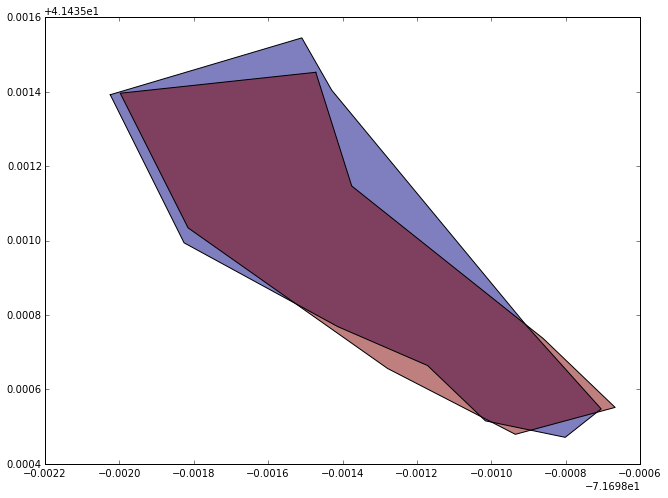

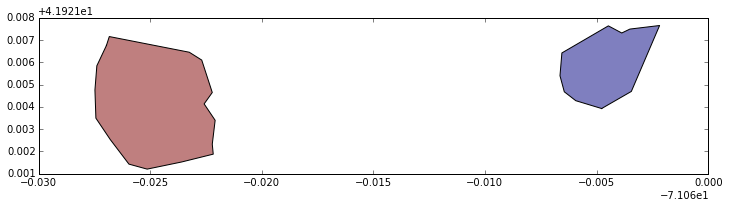

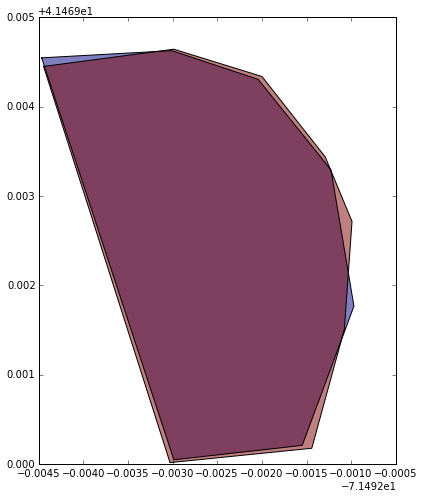

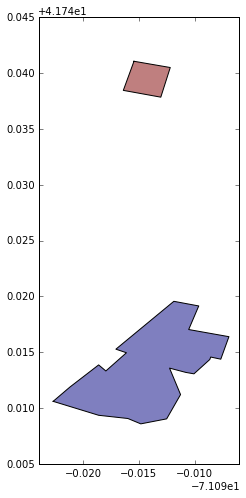

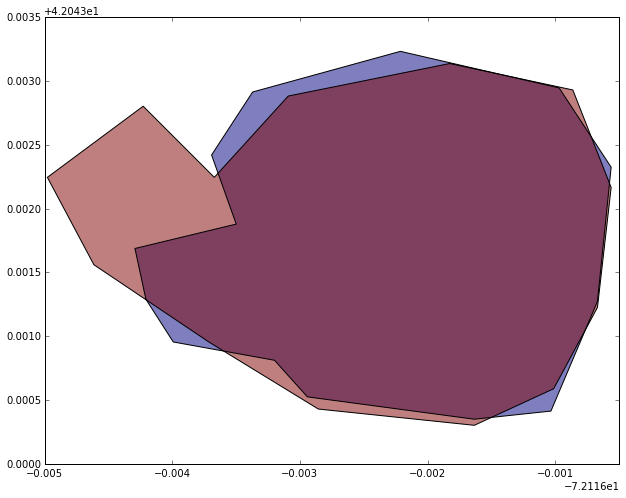

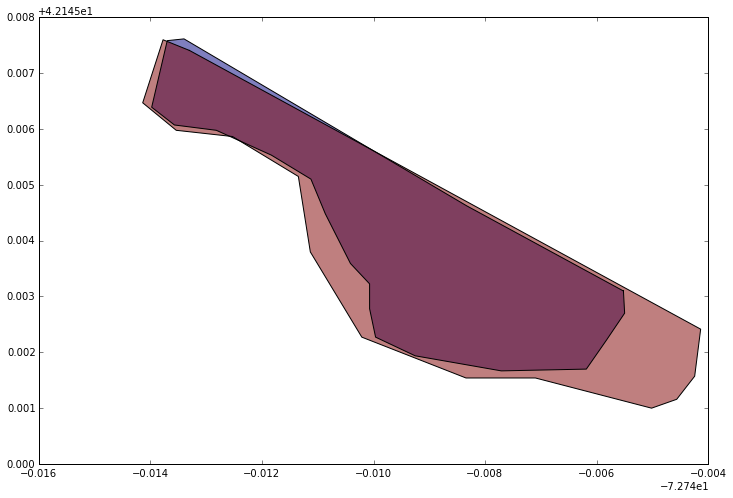

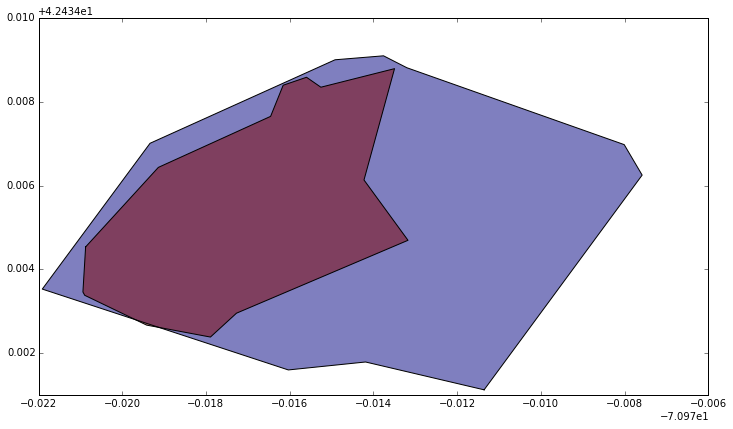

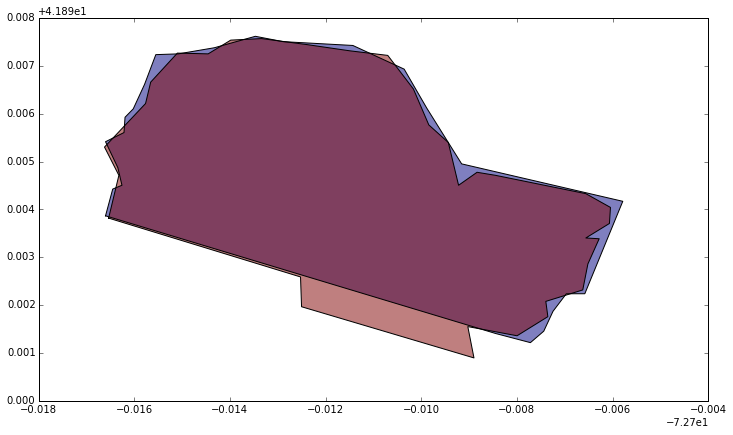

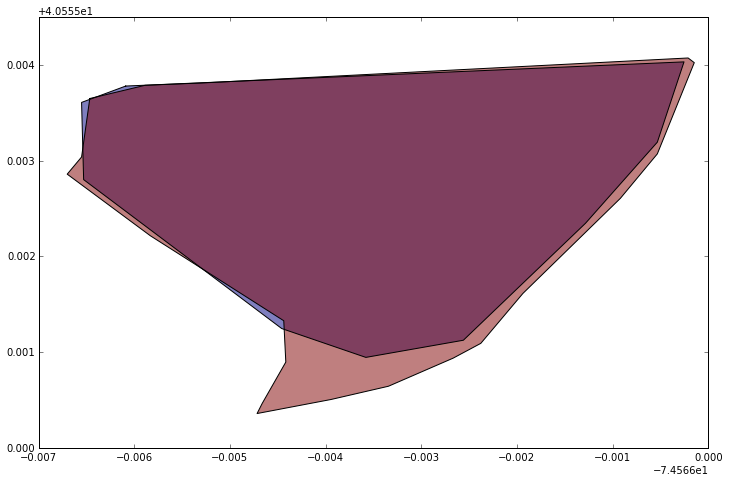

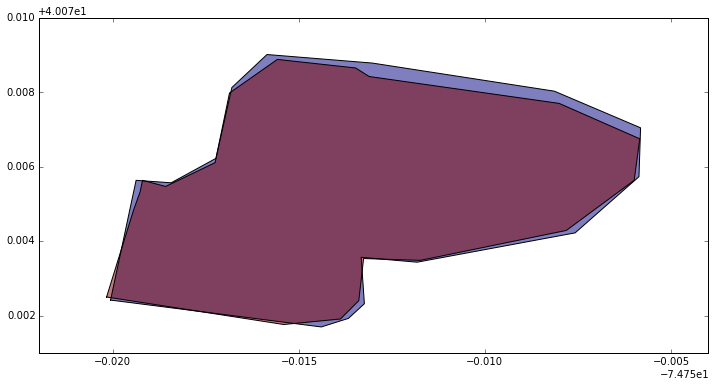

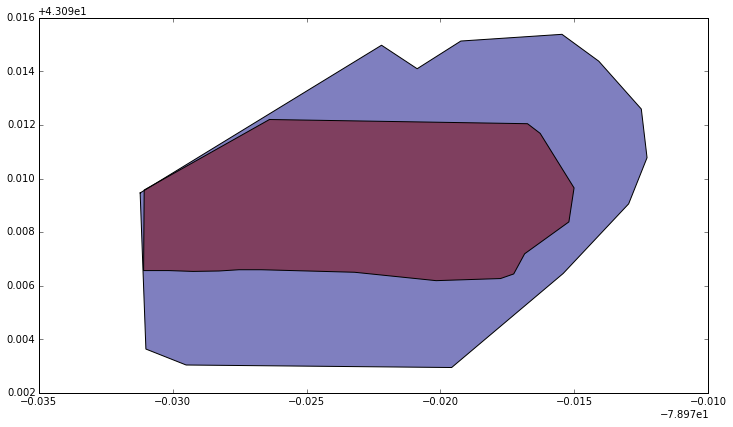

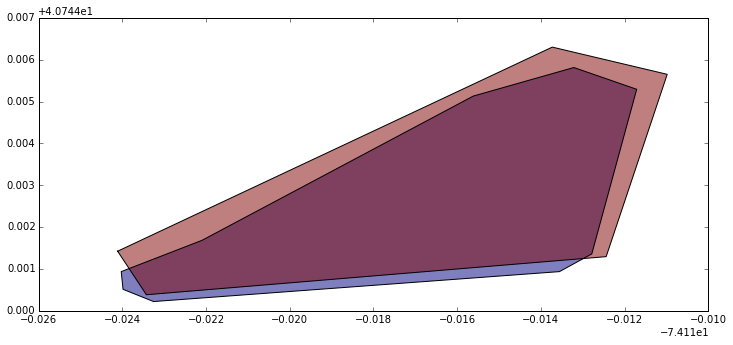

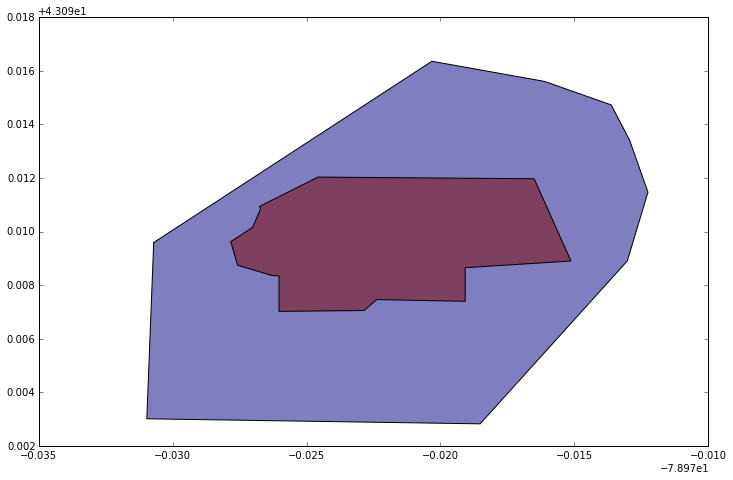

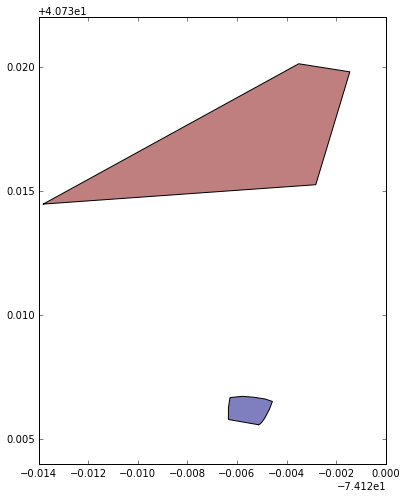

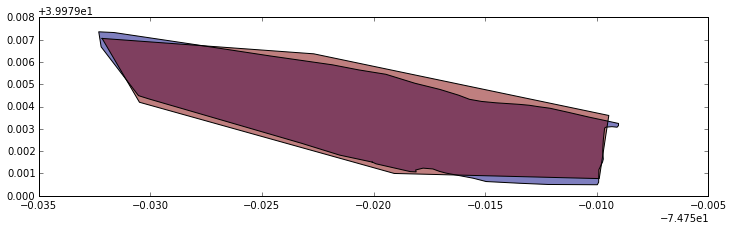

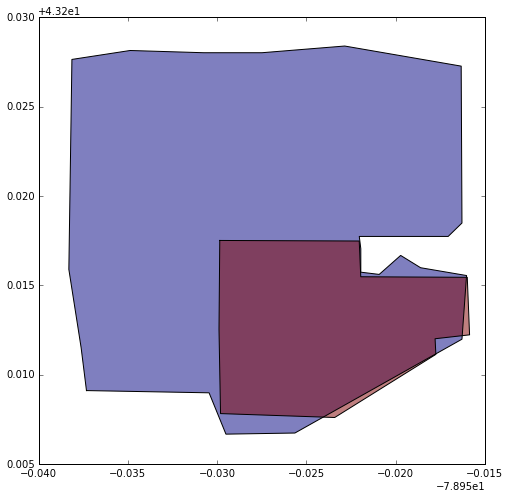

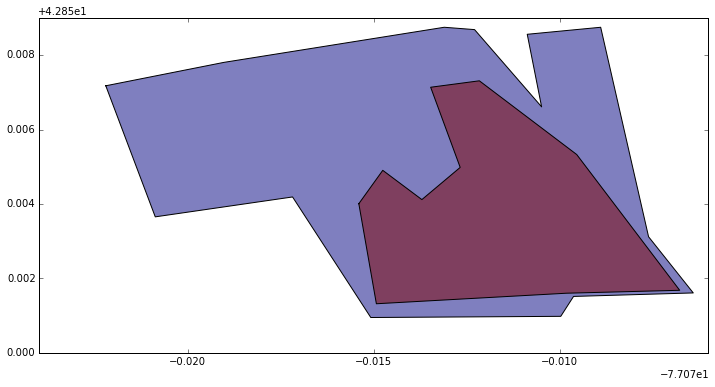

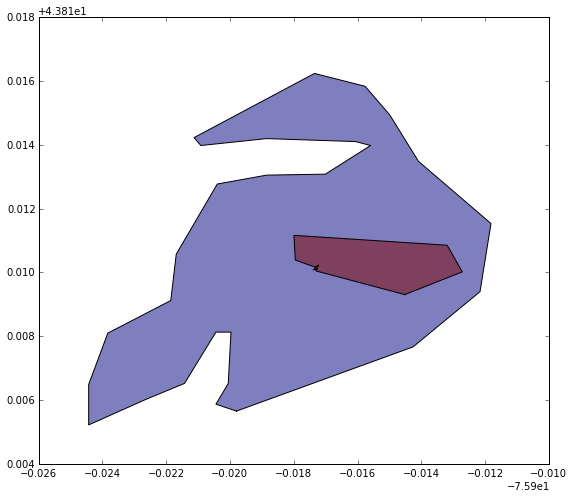

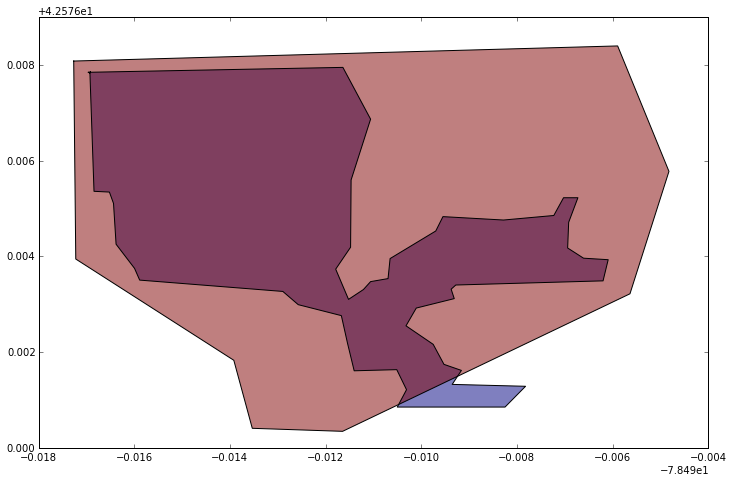

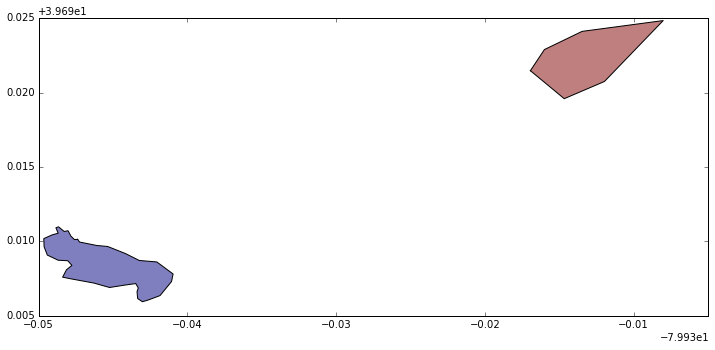

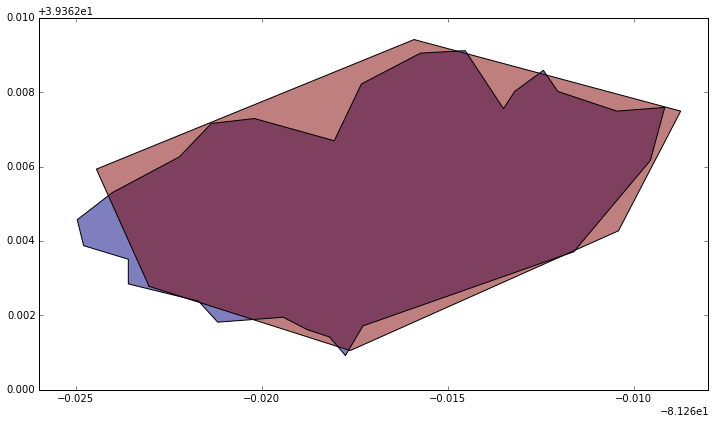

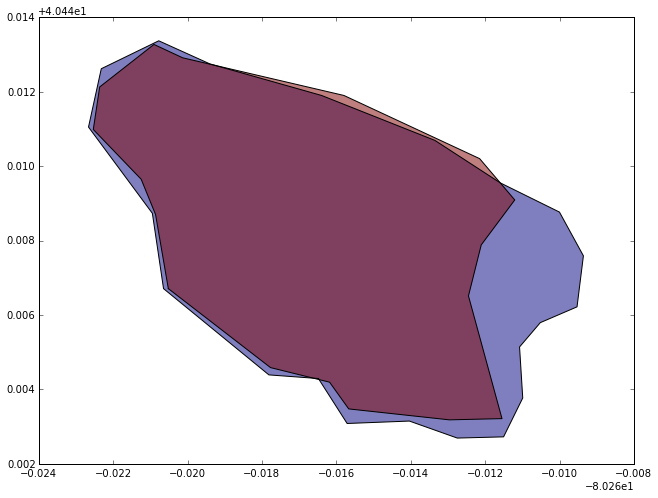

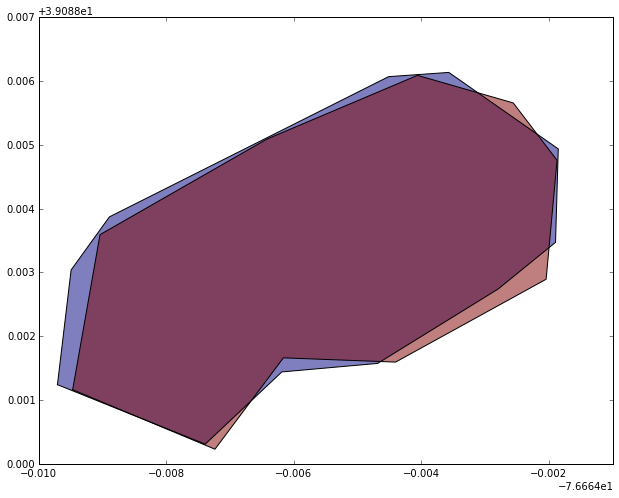

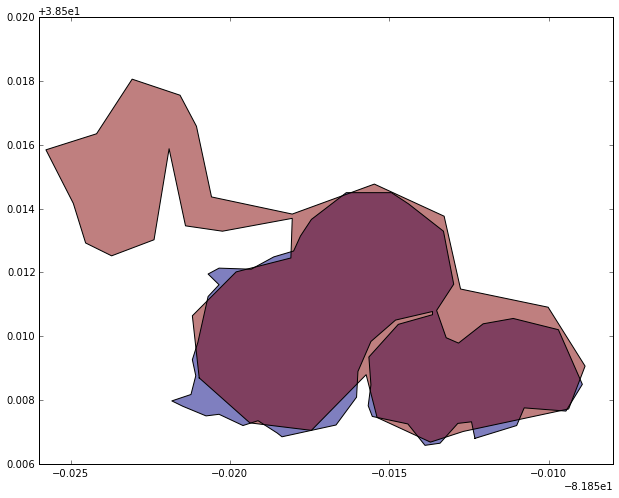

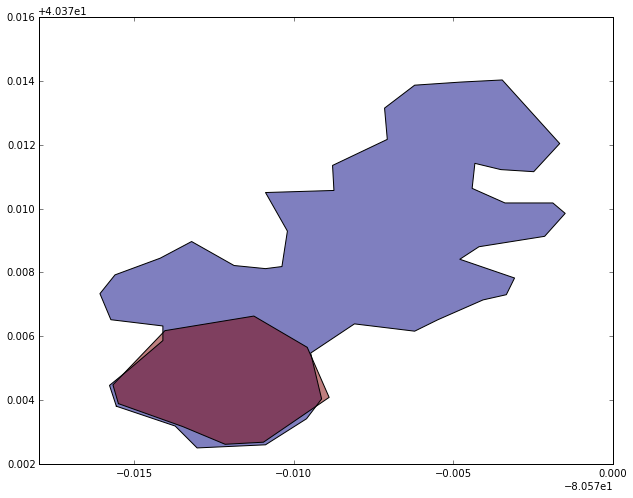

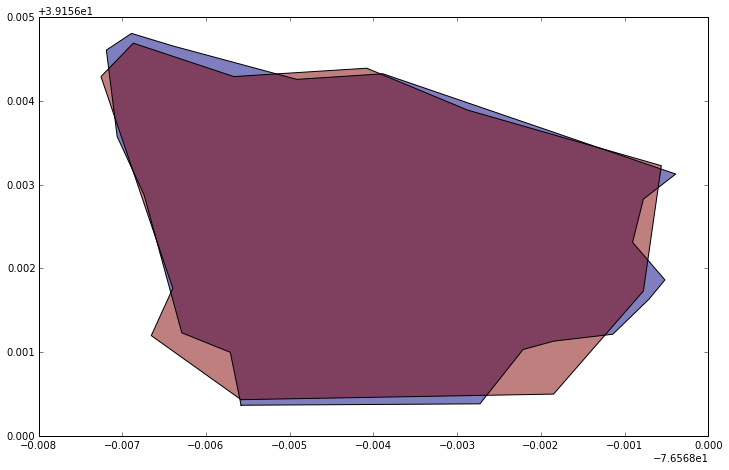

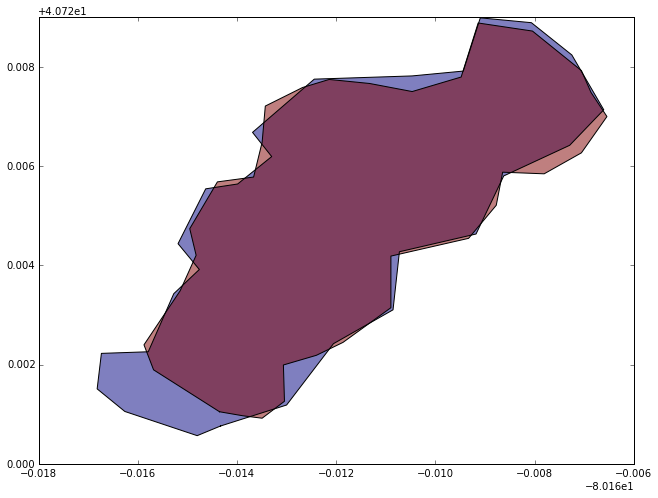

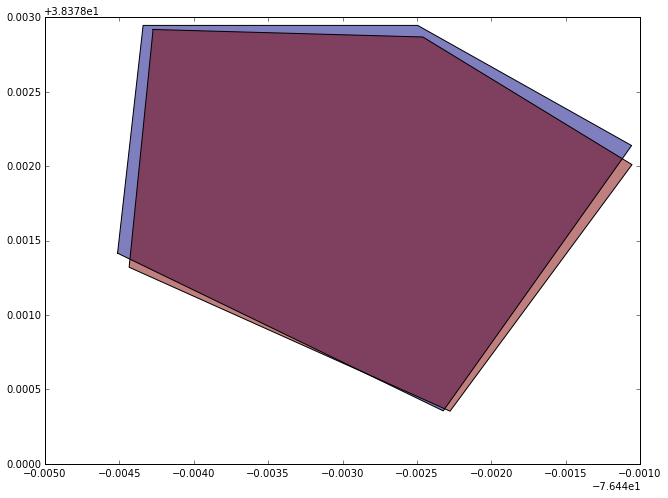

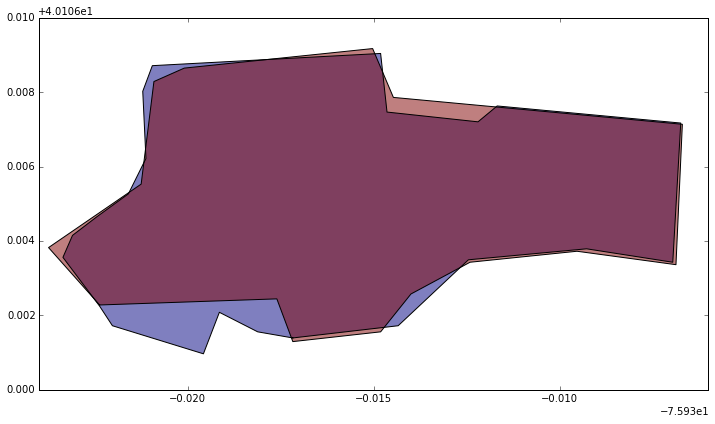

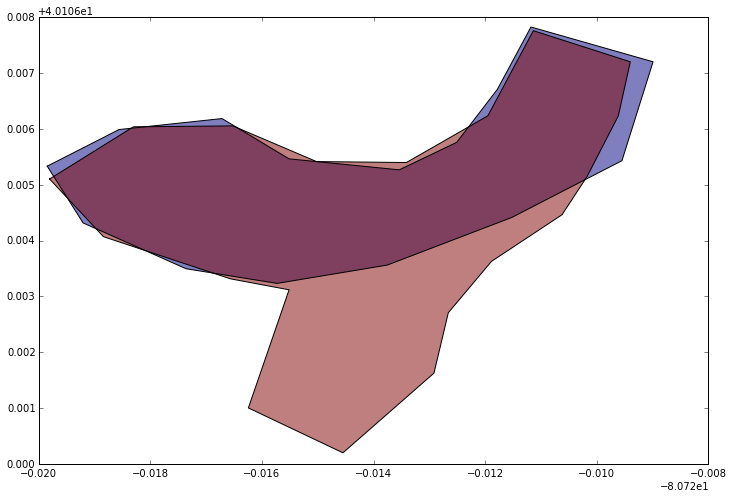

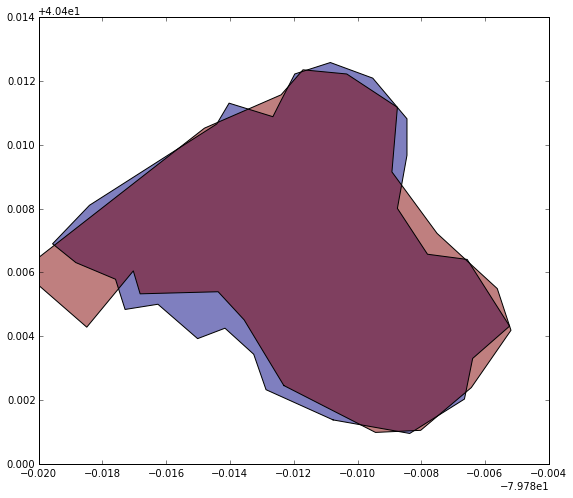

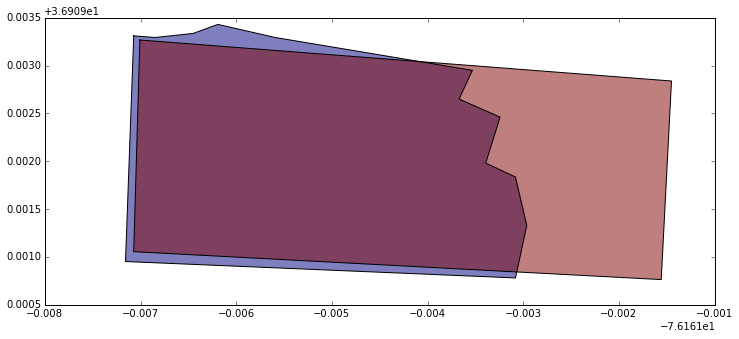

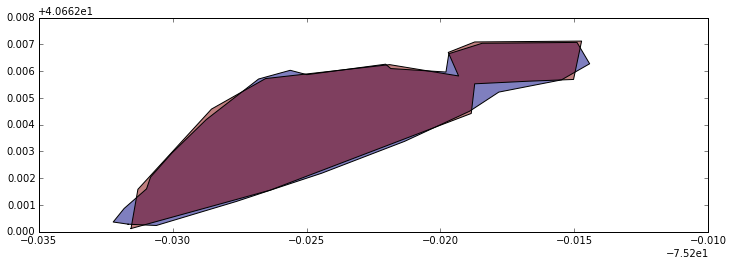

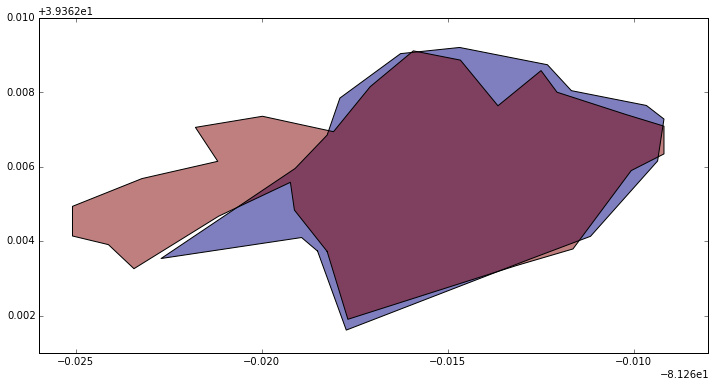

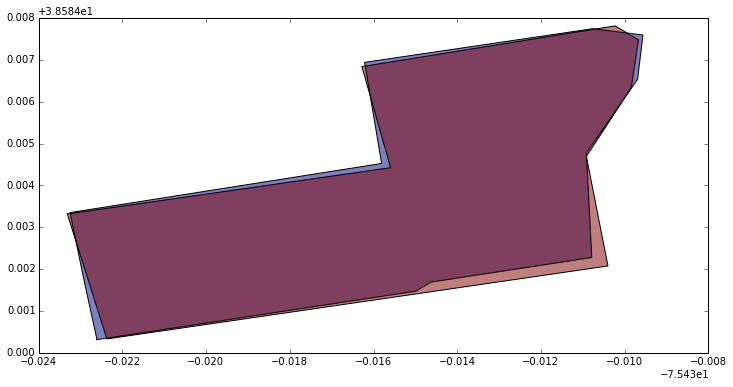

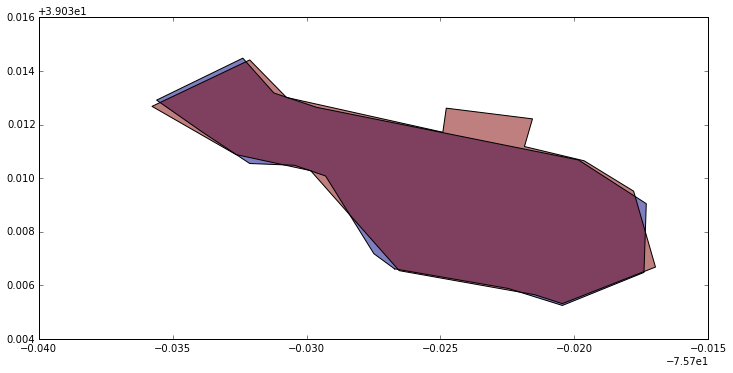

In [12]:
# Plot tasks with multiple entries
for ind, val in multiples.groupby('task_id'):
    val.plot()

In [217]:
def get_intersections(df):
    '''For each task_id group, create a list of indexes
    for landfills that intersect'''
    
    mask = {}
    for ind, val in df.iterrows():
        landfill = gp.GeoDataFrame(val)
        landfill['geometry'] = val['geometry']
        mask[ind] = []

        for ind1, val1 in df.iterrows():

            test_landfill = gp.GeoDataFrame(val1)
            test_landfill = val1['geometry']
            try:
                res = landfill.intersects(test_landfill)['task_id']
            except:
                print "Error on geoemtry: %s" %(ind1)
                
            if res:
                mask[ind].append(ind1)

    mask = [list(x) for x in set(tuple(x) for x in mask.values())]
    for i in mask:
        return i
    
#################################################

# mask are the indexes of landfill groups - ie landfills that intersect
mask = []
for ind, val in df.groupby(['task_id']):
    if len(val) > 1:
        mask.append(get_intersections(val))

ERROR:shapely.geos:TopologyException: side location conflict at -70.576332645446868 41.729185314009783


Error on geoemtry: 23


### Stats about groups of landfills

In [218]:
print "Number of non-overlapping polygons from tasks with multiple entries: %s" %(len(mask))
print "Number of overlapping polygons from tasks with multiple entries: %s" %(45)

Number of non-overlapping polygons from tasks with multiple entries: 79
Number of overlapping polygons from tasks with multiple entries: 45


### How similar are peoples responses?

This is looking at the differences between entries based on **landfill area**

In [15]:
# Calculate descriptive stats for each group of landfills.  What is the
# average landfill area, max/min and std.

stats = {}
for landfill_groups in mask:
    ind = df.loc[landfill_groups]['task_id'].unique()[0]
    stats[ind] = {'max': None, 'min': None, 'mean': None, 'std': None}
    
    stats[ind]['max'] = df.loc[landfill_groups]['area'].max()
    stats[ind]['min'] = df.loc[landfill_groups]['area'].min()    
    stats[ind]['mean'] = df.loc[landfill_groups]['area'].mean()
    stats[ind]['std'] = df.loc[landfill_groups]['area'].std()    

In [16]:
stats = pd.DataFrame(stats).T
stats.loc[501711] = np.nan

In [19]:
# for all entries, how well did people do?
stats.describe()

max            mean             min             std
count       78.000000       78.000000       78.000000       66.000000
mean    378912.663202   315760.537673   251459.403752   100941.336624
std     520600.163578   367842.116093   255850.574699   275730.622260
min       3898.286807     3808.517042     3718.747278      126.953618
25%      75726.024034    74660.033220    69008.555941     2736.967875
50%     212686.143188   203286.538802   156705.446709    13974.147699
75%     502397.992160   441201.768510   359712.126251    51320.861575
max    3701305.316815  2332206.421711  1129670.078043  1936198.225685

In [21]:
# The average std deviation percentage
p = stats[stats['std'].notnull()]
p['std_pct'] = (p['mean'] / p['std'])

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [637]:
# The average std is 24 but the standard deviation of that average is 26... not so good
p['std_pct'].describe()

count     44.000000
mean      24.163967
std       26.827315
min        1.204529
25%        7.122000
50%       15.639167
75%       30.022158
max      133.478364
Name: std_pct, dtype: float64

                 max           mean            min           std
count      49.000000      49.000000      49.000000     49.000000
mean   239397.171331  229801.719310  219786.409632  11437.485977
std    229745.936658  224478.315738  219869.633065  12178.445969
min      3898.286807    3808.517042    3718.747278    126.953618
25%     73963.110349   71613.918730   64306.785908   2325.585925
50%    139648.819191  133190.497772  123362.583667   5593.630714
75%    376981.475959  363130.242423  335487.754538  19896.900020
max    835553.596553  830276.249336  824998.902119  45354.946379


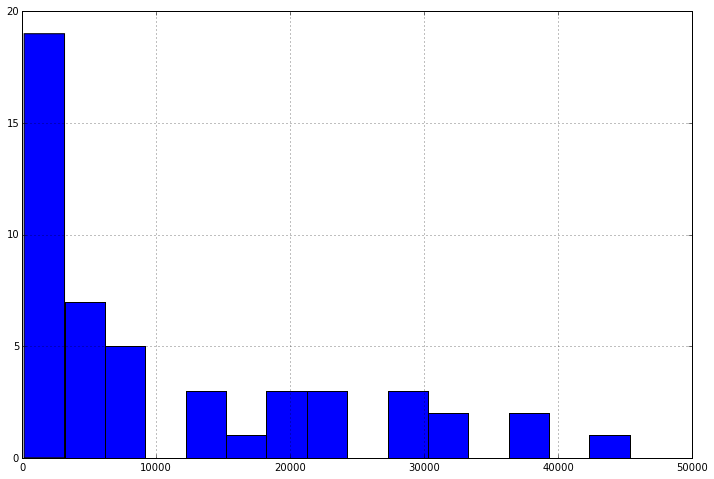

In [28]:
# distribution of standard deviations for each entry
t_stats = stats[stats['std'] < 50000]
print t_stats.describe()
t_stats['std'].hist(bins=15)

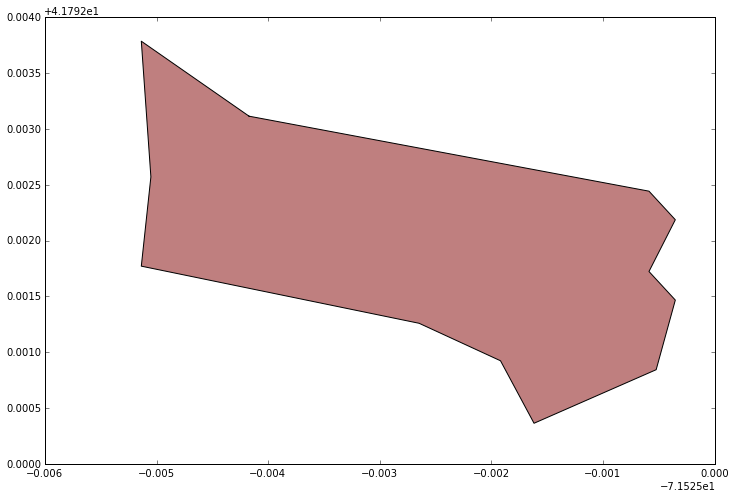

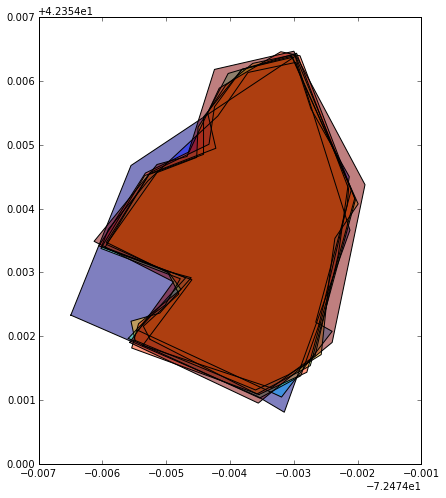

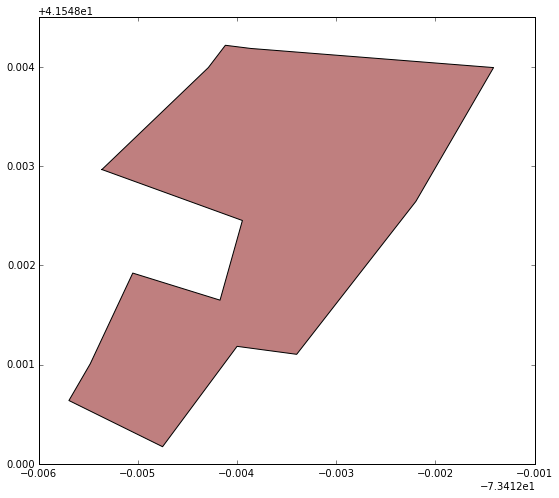

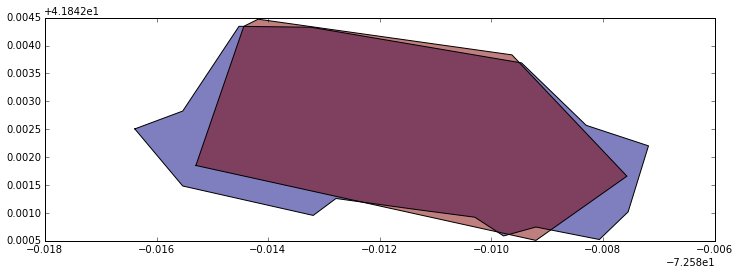

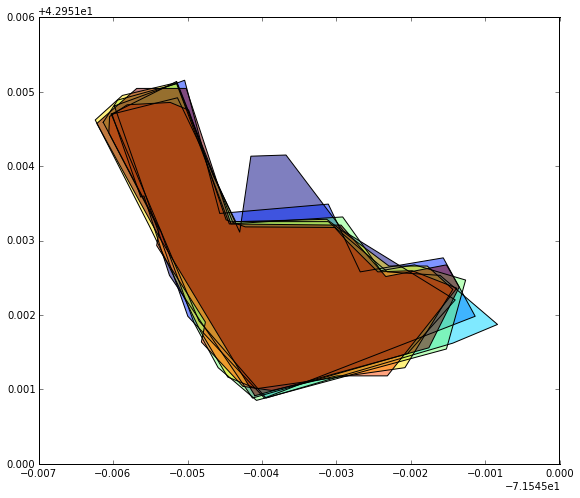

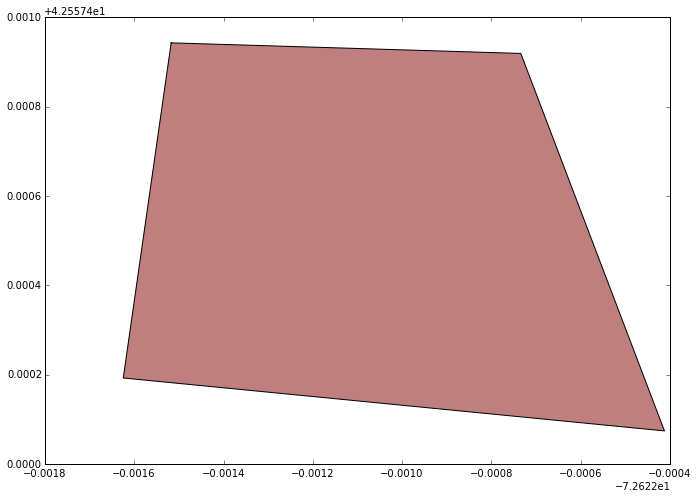

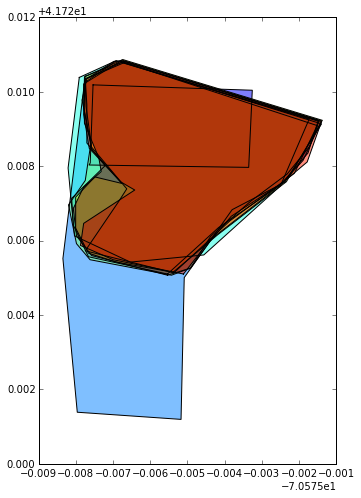

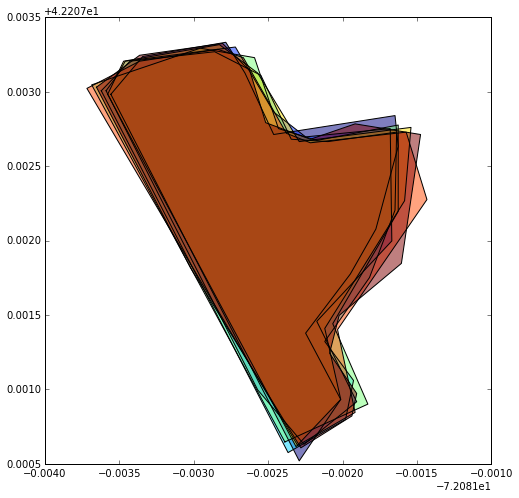

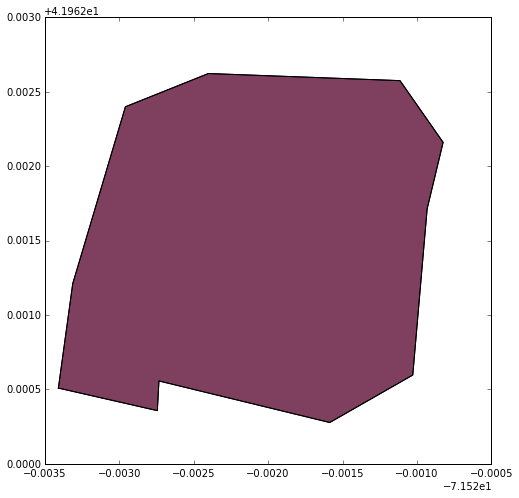

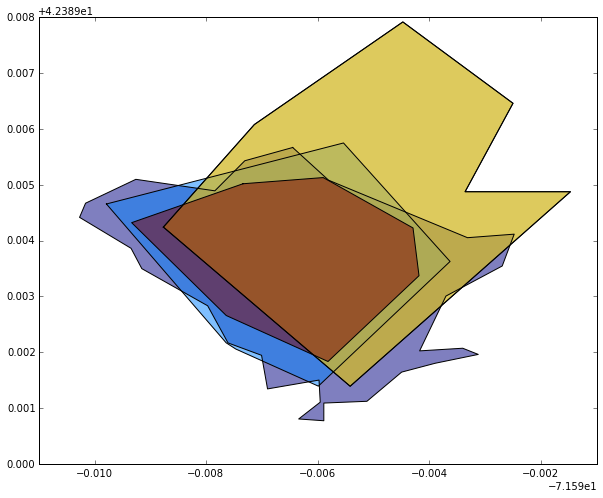

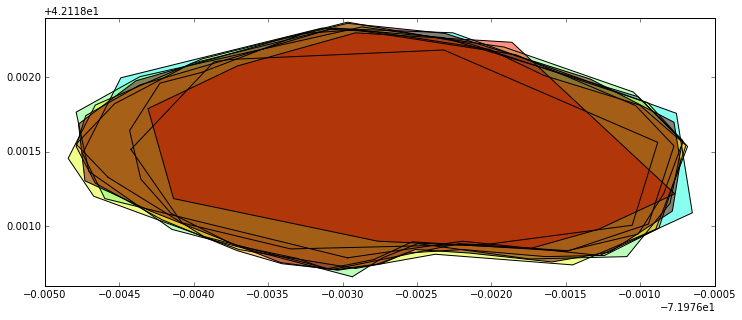

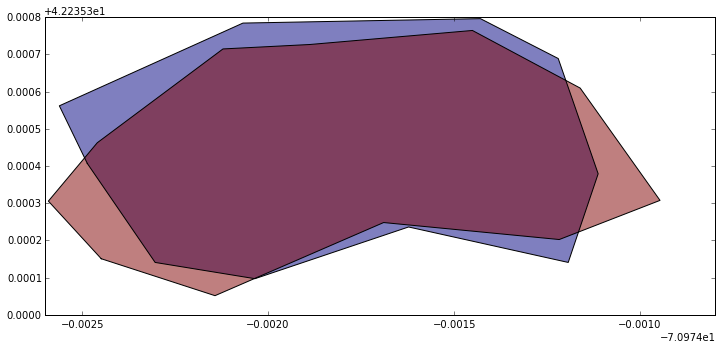

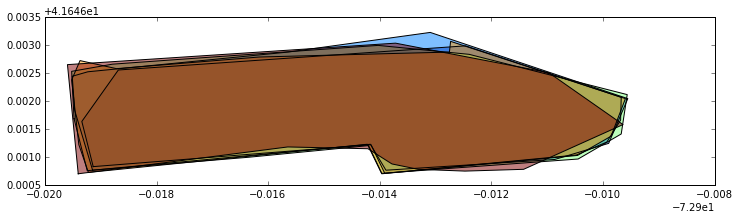

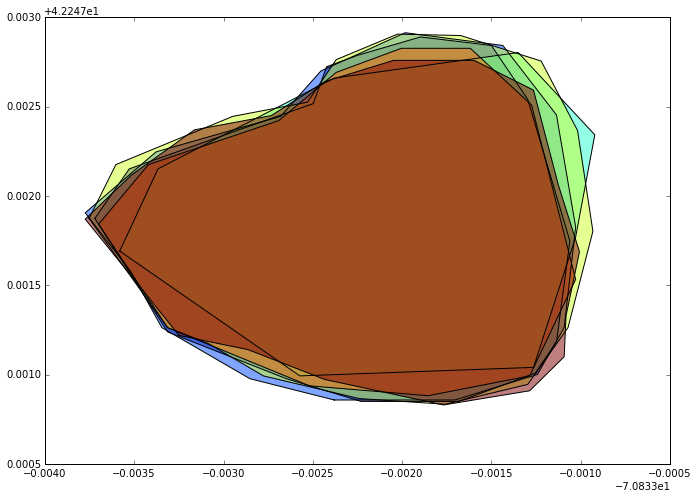

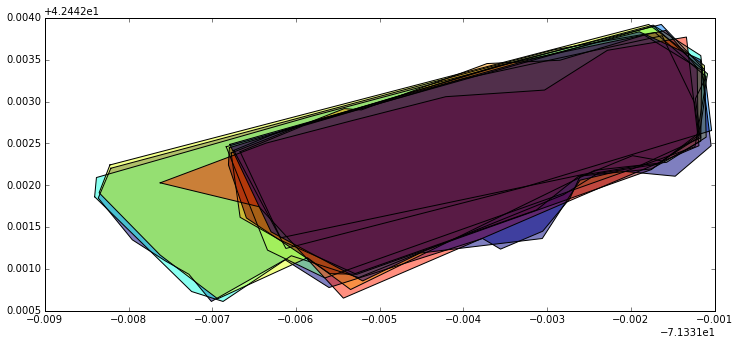

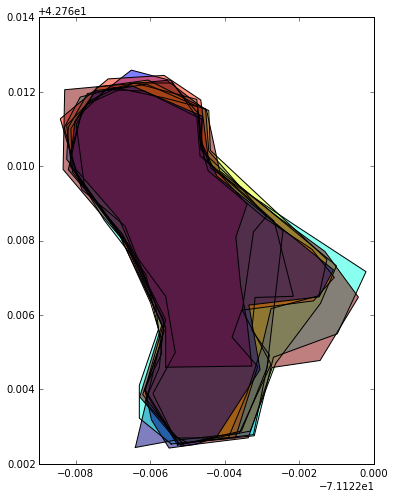

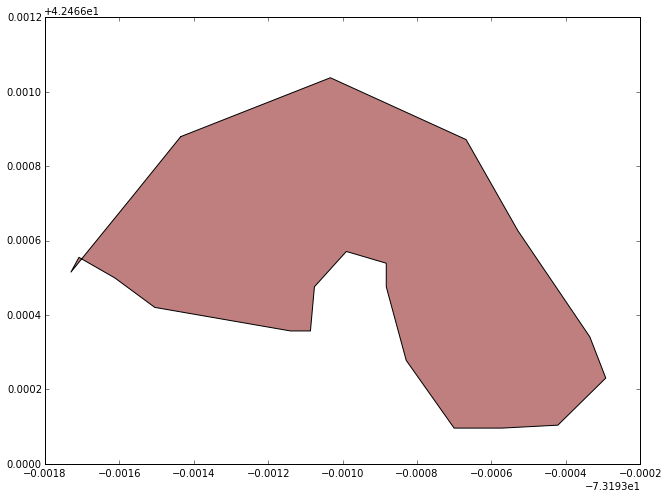

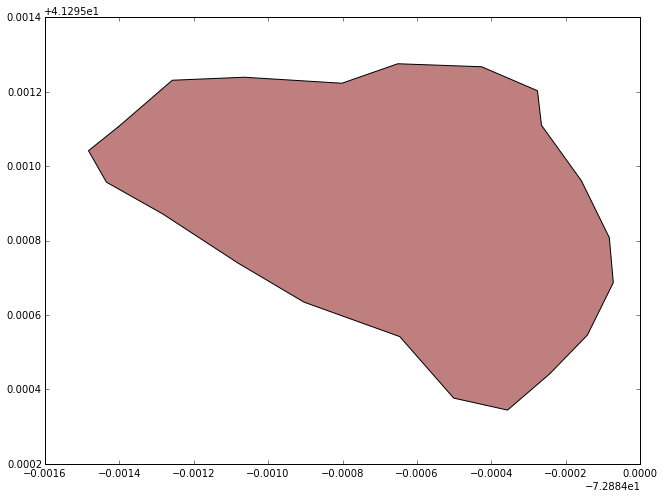

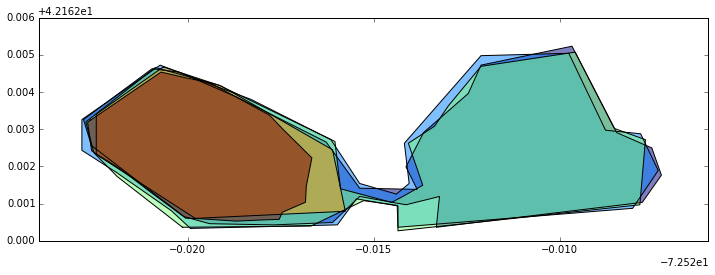

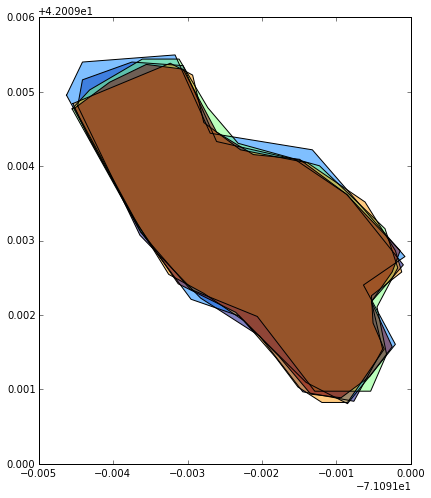

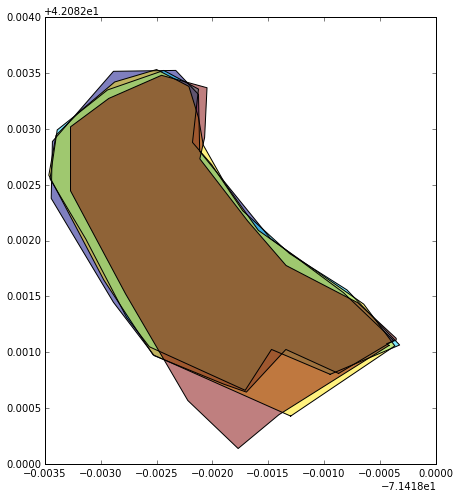

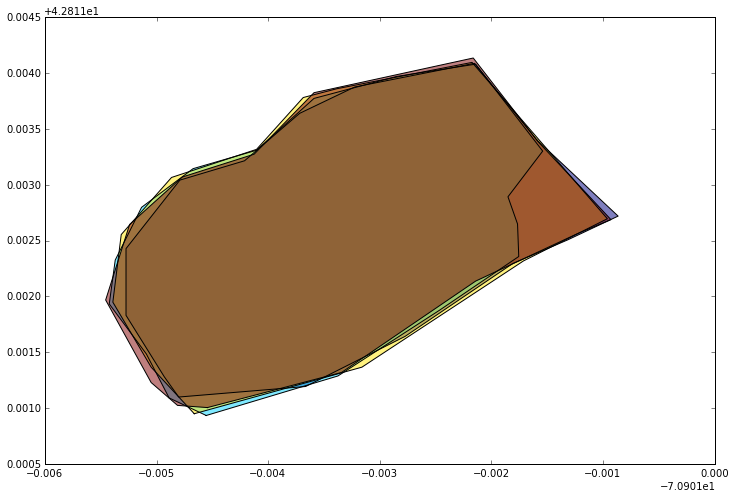

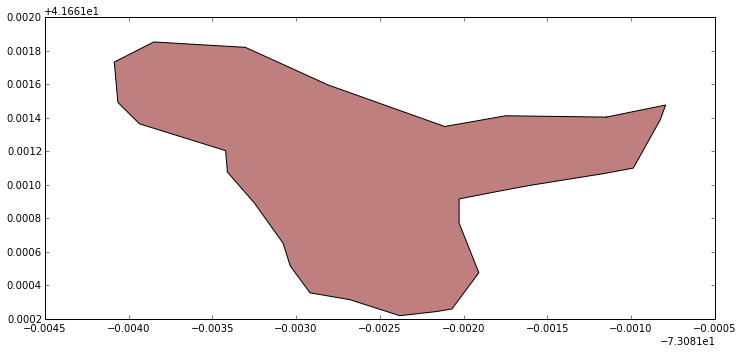

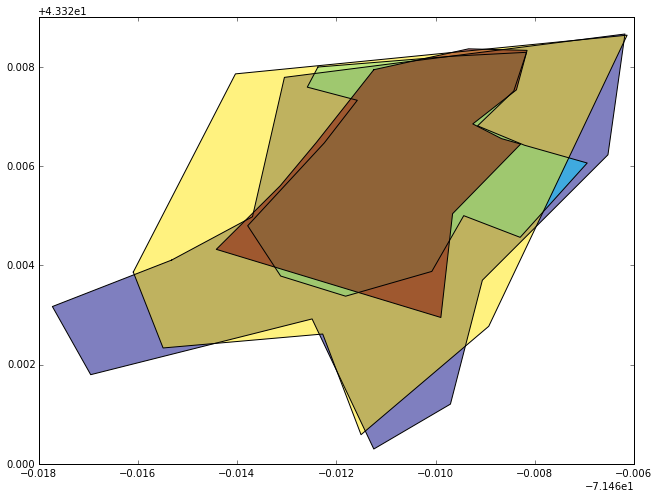

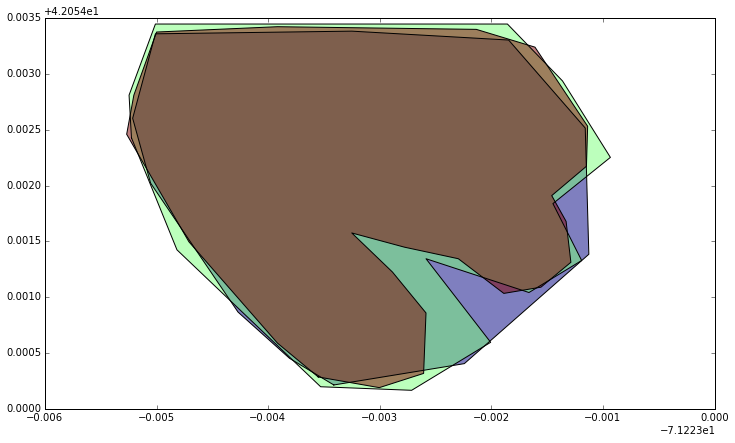

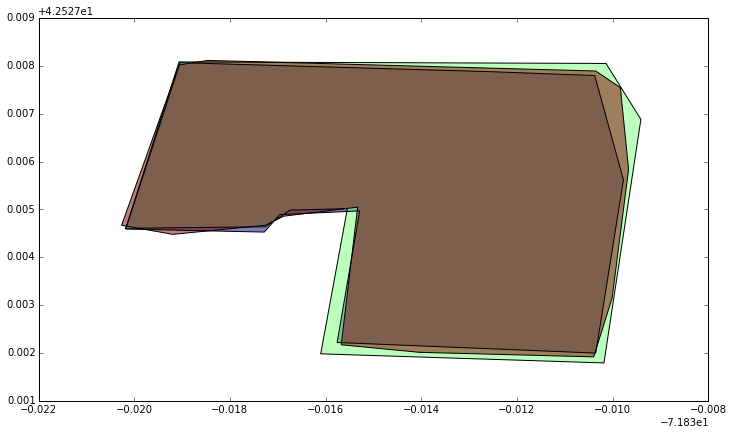

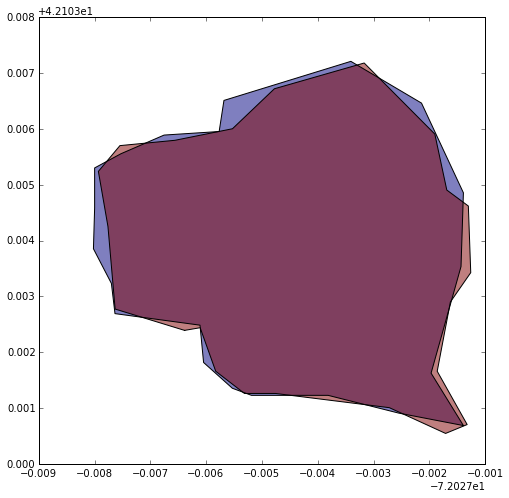

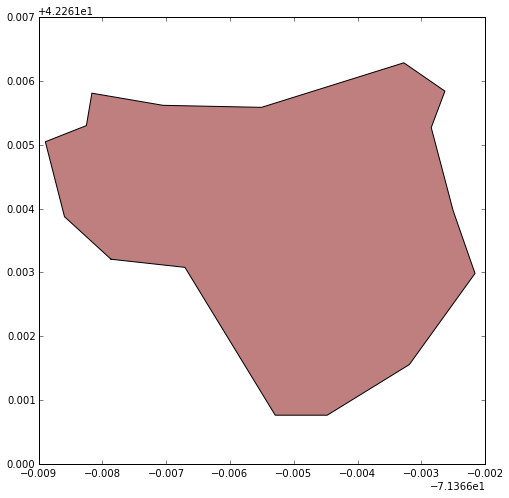

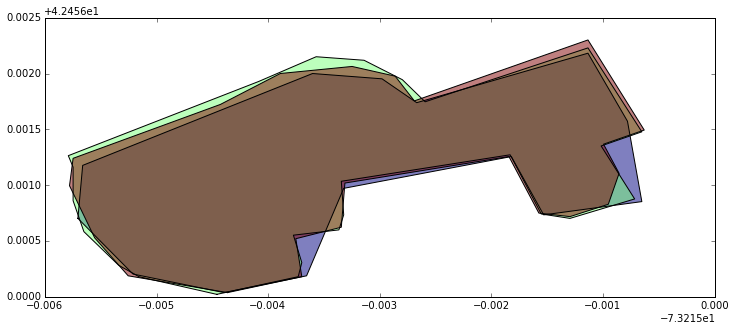

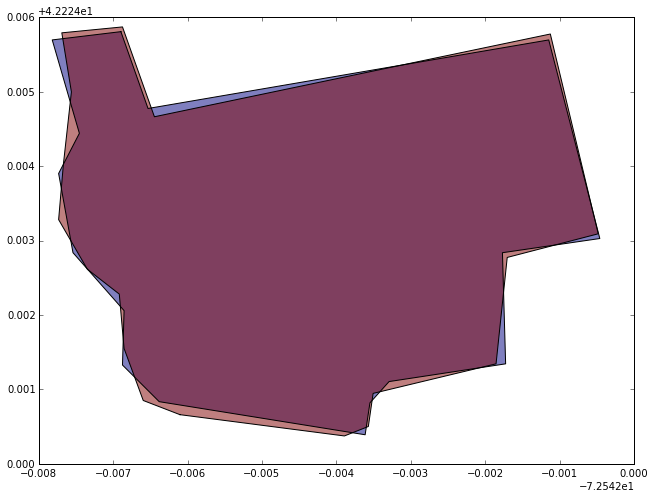

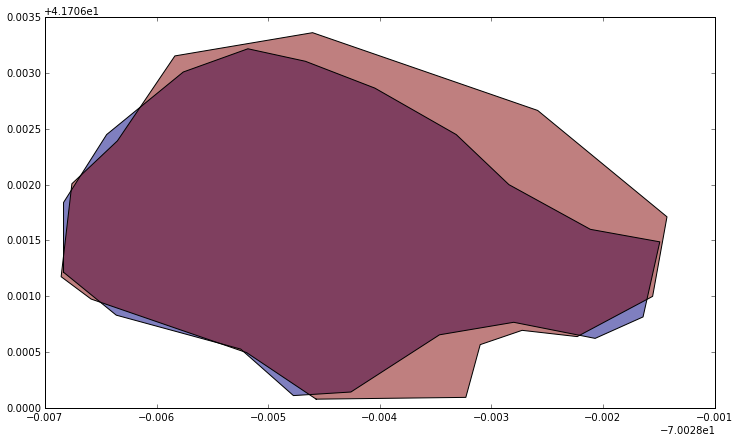

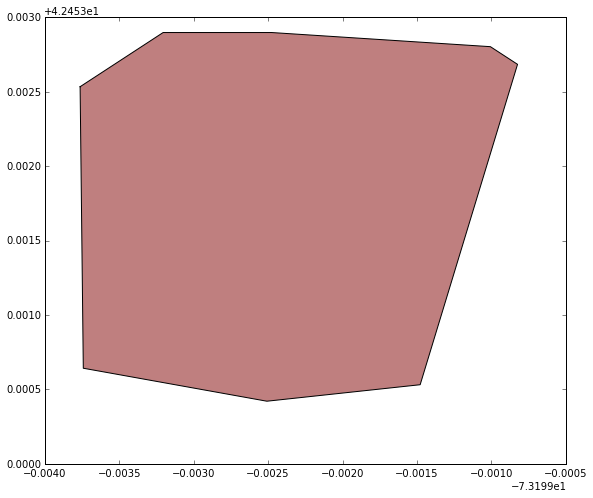

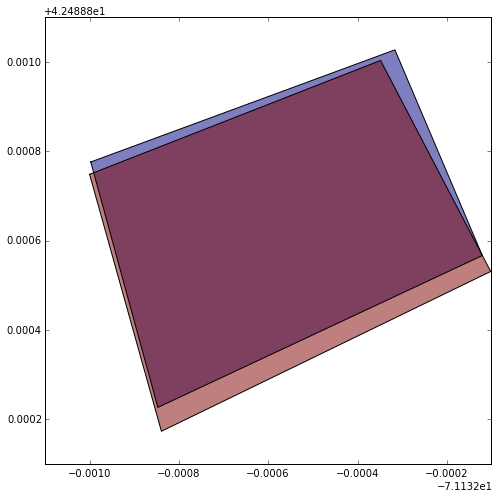

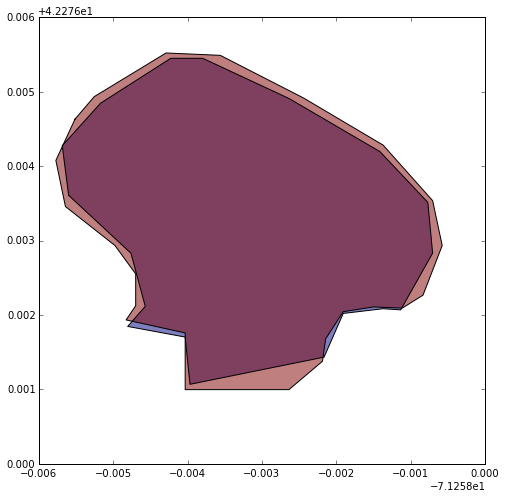

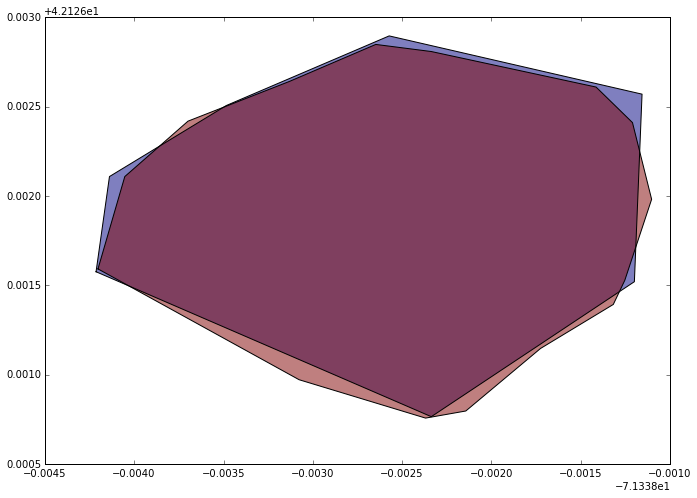

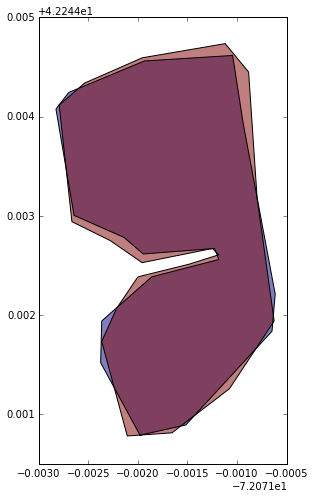

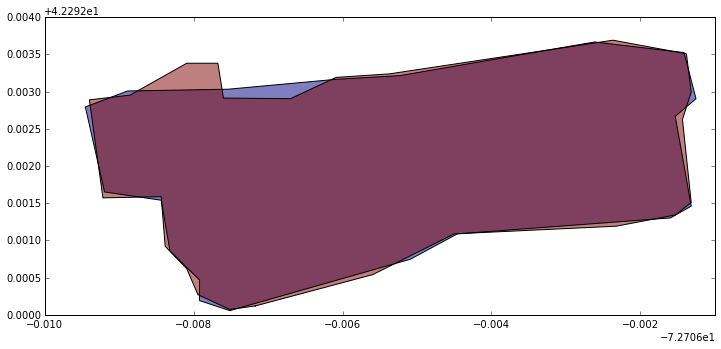

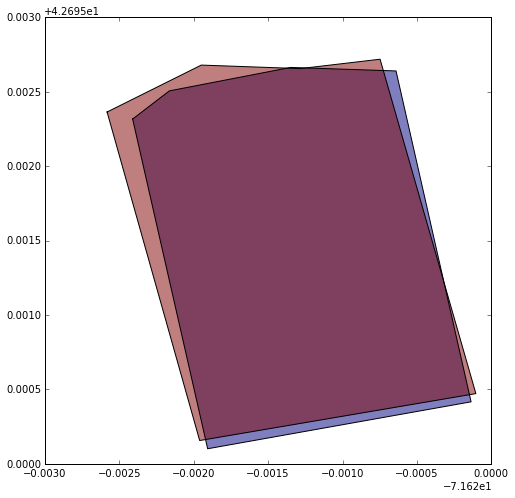

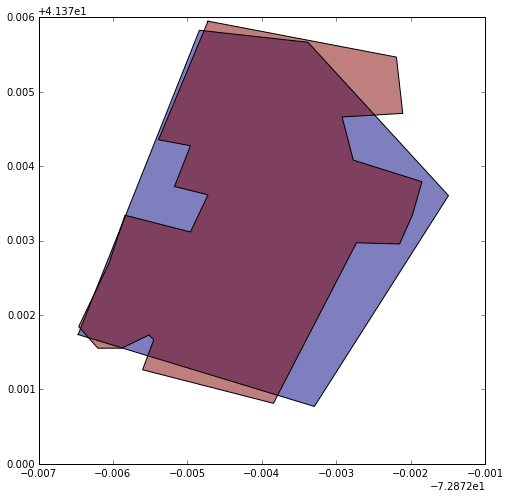

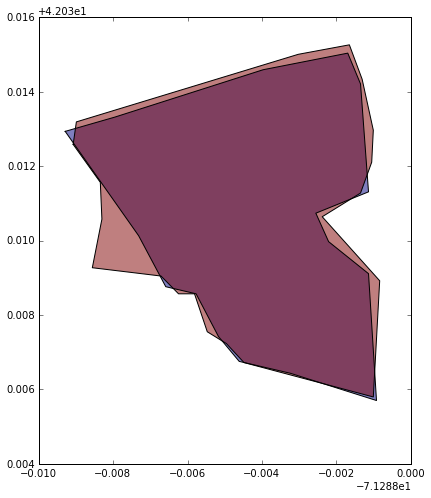

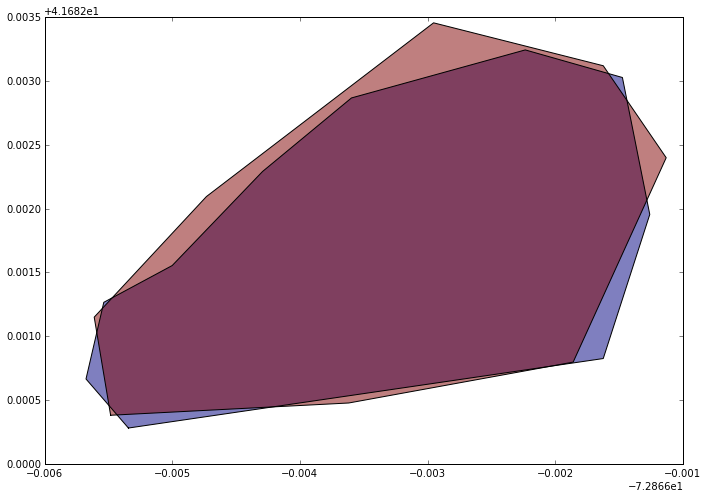

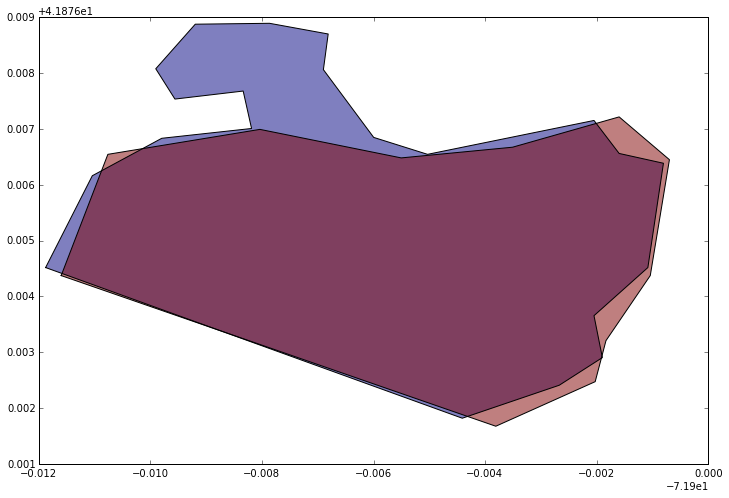

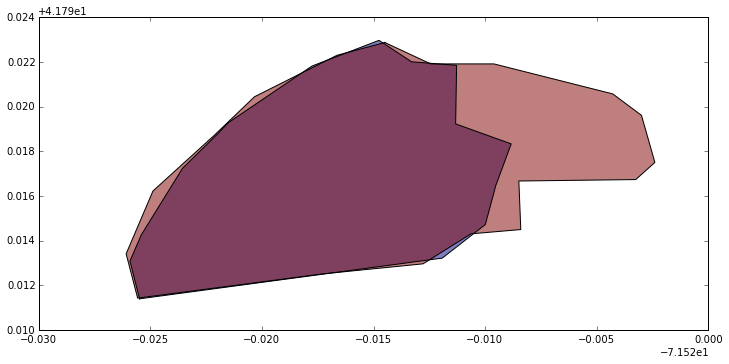

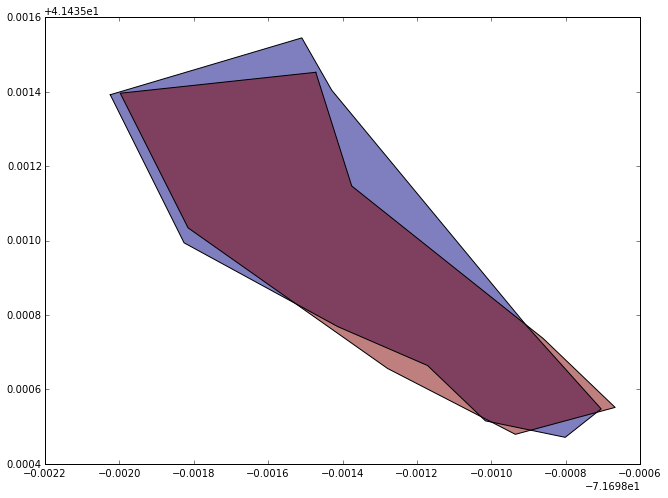

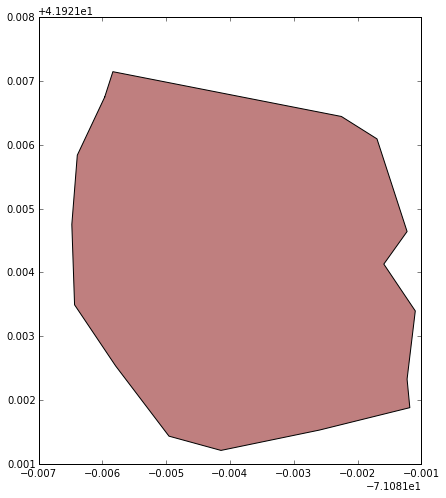

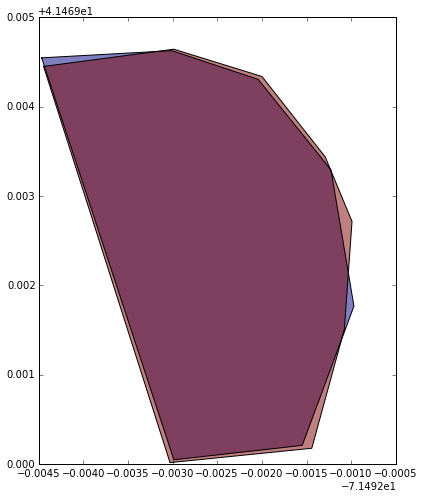

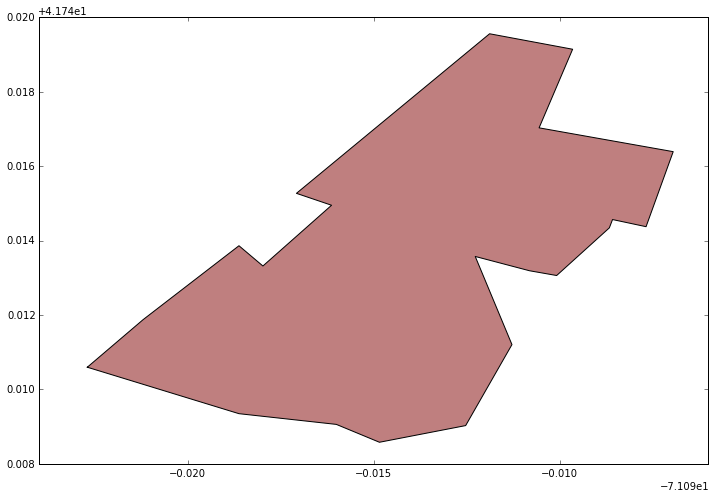

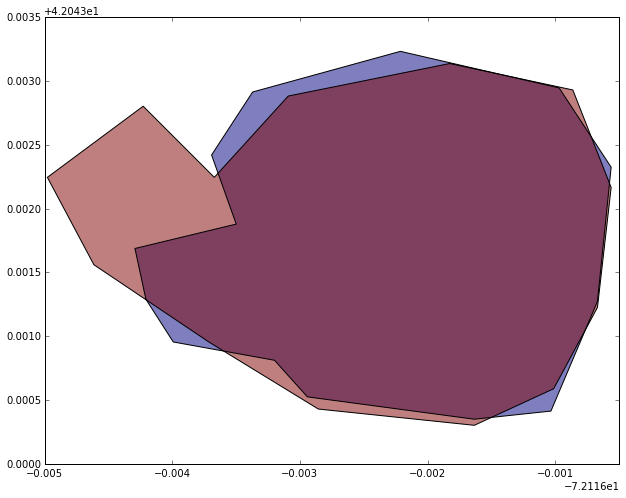

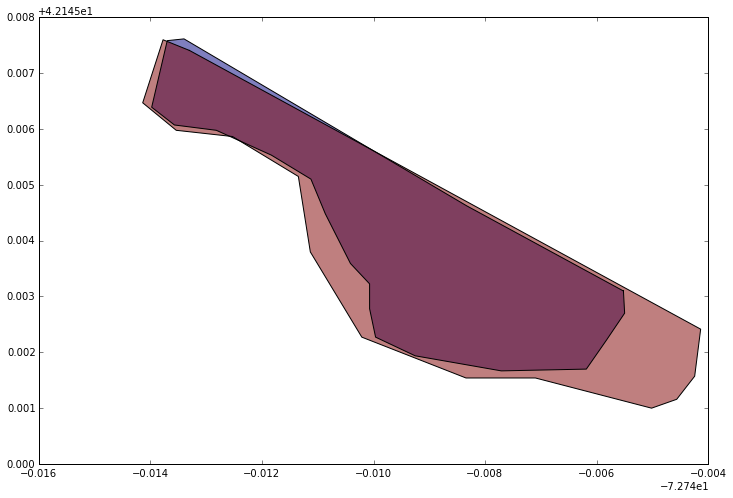

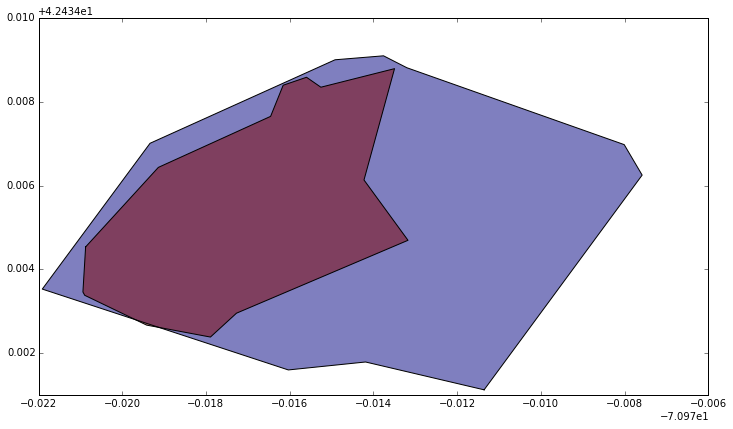

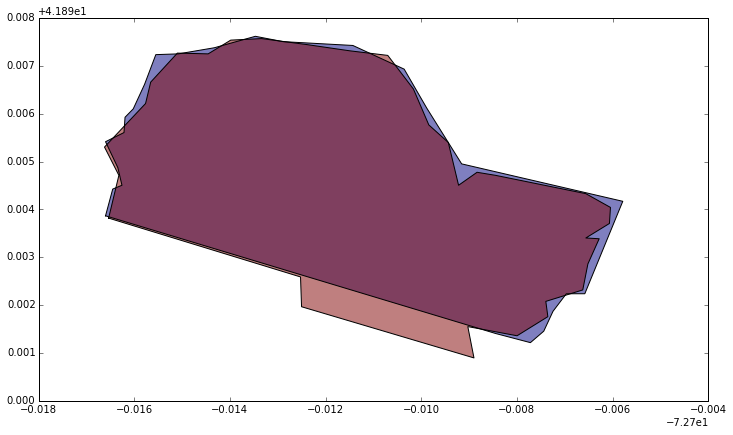

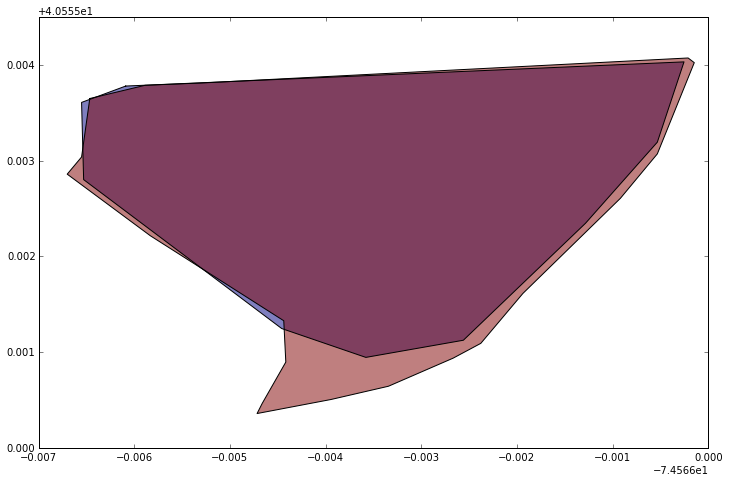

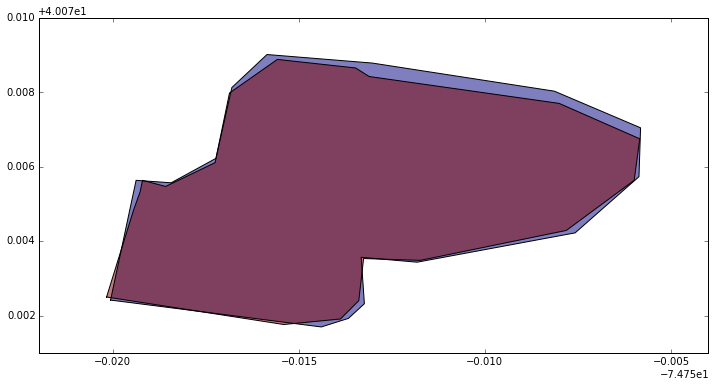

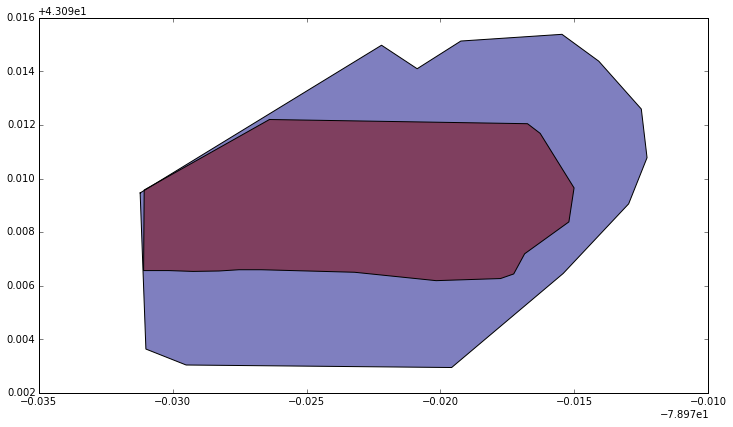

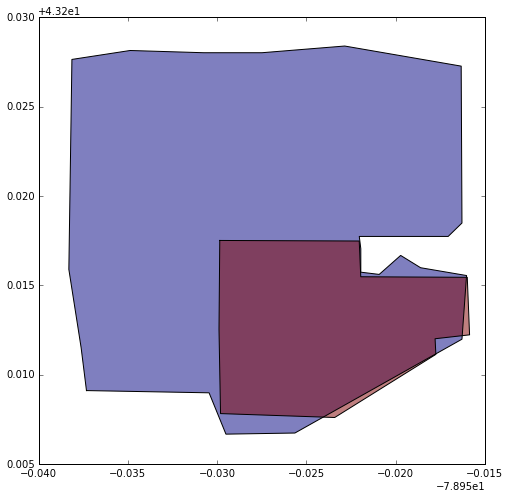

In [427]:
# only landfills that intersect
for landfill_groups in mask:
    df.loc[landfill_groups].plot()

In [30]:
# Overall average area for each entry
pd.pivot_table(df, index=['task_id'], values=['area'], aggfunc=np.mean).head()

area
task_id               
501701   986141.856586
501702   512871.805193
501703   283684.851809
501704   749860.464495
501706    88660.680029

In [31]:
area_std = [[ind, val['area'].std() * 3] for ind, val in df.groupby(['task_id'])]
area_std = dict(area_std)

# TO DO:

- build features to train a bayesian model.  These could include, percent of landfills intersecting, number of points per polygon, area of the polygon, standard deviation, etc...

- Then, you should be able to give a probability of how accuract each landfill

### Get number of points per polygon

In [251]:
df['number_of_points'] = df['geometry'].map(lambda x: len(x.array_interface_base['data']) / 2)

In [269]:
df['task_id'] 

area               fac_name fac_state        fac_street  \
0    74336.879239  AMERICAN DISPOSAL INC        RI  23 GREEN HILL RD   
1     8977.979795  AMERICAN DISPOSAL INC        RI  23 GREEN HILL RD   
2  1275812.214490  AMERICAN DISPOSAL INC        RI  23 GREEN HILL RD   
3   300607.715762     ASTI WASTE SYSTEMS        CT  182-2 DANBURY RD   
4  1114961.938569  AMERICAN DISPOSAL INC        RI  23 GREEN HILL RD   

                                            geometry  \
0  POLYGON ((-71.52917097350966 41.79511484405755...   
1  POLYGON ((-71.5351442529862 41.79629064209585,...   
2  POLYGON ((-71.54515693923918 41.80168943778234...   
3  POLYGON ((-73.42464753303524 41.5462933224311,...   
4  POLYGON ((-71.5342107371843 41.81284982596986,...   

                              id  task_id           task_run__created  \
0  OpenLayers_Feature_Vector_340   501701  2014-04-11T18:02:24.061996   
1  OpenLayers_Feature_Vector_333   501701  2014-04-11T18:02:56.660754   
2  OpenLayers_Feature_Vector_316   501701  2014-04-11T18:03:09.583790   
3  OpenLayers_Feature_Vector_735   501703  2014-04-11T18:03:58.458460   
4  OpenLayers_Feature_Vector_521   501701  2014-04-11T18:03:58.556272   

        task_run__finish_time  task_run__id task_run__user_ip  \
0  2014-04-11T18:02:24.062013        629898              None   
1  2014-04-11T18:02:56.660769        629899     216.165.95.69   
2  2014-04-11T18:03:09.583808        629900              None   
3  2014-04-11T18:03:58.458477        629903     216.165.95.69   
4  2014-04-11T18:03:58.556288        629904     216.165.95.70   

   task_runinfo__certain  task_runinfo__skip task_user_id  
0                      0                   0         4038  
1                     -1                   0         None  
2                      1                   0            5  
3                     -1                   0         None  
4                     -1                   0         None

## End Here

---

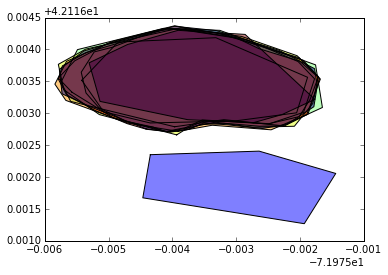

In [60]:
df[df['task_id'] == 501713].plot()

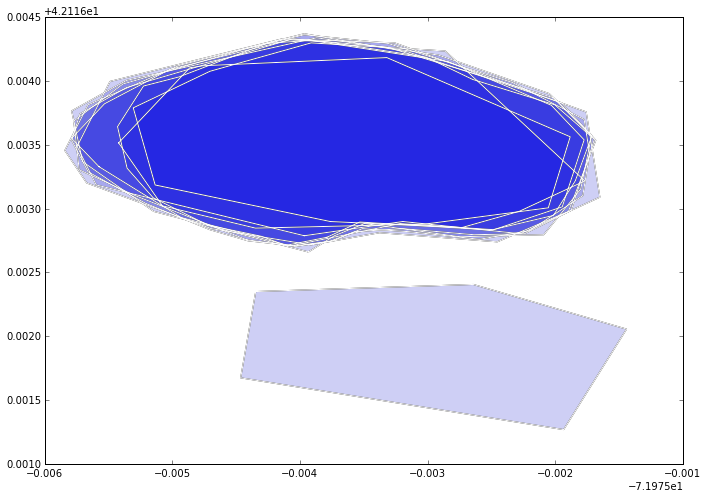

In [596]:
ax = df[df['task_id'] == 501713].plot()

for i in ax.patches:
    i.set_color("#111999")
    i.set_alpha(0.1)
    i.set_edgecolor("none")
#     i.set_linewidth(0)
#     i.set_joinstyle('bevel')
#     i.set_linestyle('dashed')


#ax.patches
for i in df[df['task_id'] == 501713]['geometry']:
    gp.plotting.plot_multipolygon(ax, i, alpha=0.1, facecolor='blue', edgecolor='white')
    
#edgecolor='white', alpha=0.1, facecolor='red', linewidth=0    


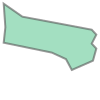

In [208]:
# show single geometry
df['geometry'][0]

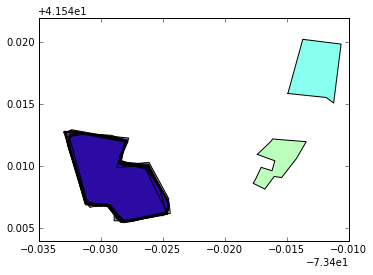

In [210]:
df[df['task_id'] == 501703].plot()
plt.show()

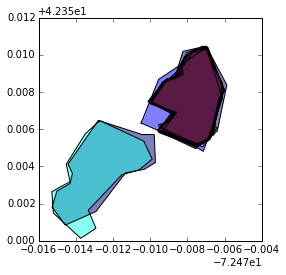

In [216]:
df[df['task_id'] == 501702][df['area'] < df['area'].std() * 3].plot()

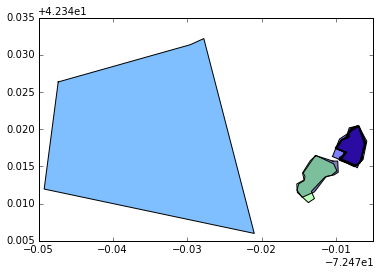

In [211]:
df[df['task_id'] == 501702].plot()
plt.show()

In [59]:
ax = df[df['task_id'] == 501713].plot()

mplleaflet.show(fig=ax.figure)

In [203]:
import mplleaflet
ax = lf.plot()
mplleaflet.show(fig=ax.figure)

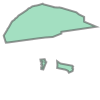

In [190]:
from shapely.ops import cascaded_union
cascaded_union(lf['geometry'])